# CIFAR 10 CLUTTERED DATASET

### IMPORTING LIBRARIES ###

In [1]:
from scipy import misc
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf


from random import shuffle
import random
import sys

from scipy.misc import imsave

import shutil

### CREATING CLUTTERED CIFAR 10 IMAGES FOR TRAINING AND TESTING ###

In [91]:
#### GETTING ALL THE FILENAMES #####
filenames_train = []
for file in glob.glob('train/*.png'):
    filenames_train.append(file)
    
# For storing the new transformed images
array_train = []    


####### PERFORMING THE TRANSFORMATIONS ###########




for j in range(len(filenames_train)):

    #Creating a 60X60 canvas and storing it as an image
    canv = np.zeros((60,60,3))
    canv1 = Image.fromarray(canv, mode = "RGB")
    
    # Loading the main image
    main_img = Image.open(filenames_train[j])
    
    #Loading 7 random images to be added as noise
    idx = random.sample(range(0, 50000), 7) 

    for i in idx:
        
        # Loading the random images for cropping 
        rand_img = Image.open(filenames_train[i])
        
        #Specifying the location where the cropping must happen
        x = random.randint(0,32)
        
        #Cropping the images
        crop1 = rand_img.crop((x,x,x+3,x+3))
        #Pasting the cropped portions on the canvas
        canv1.paste(crop1, (random.randint(0, 59),random.randint(0, 59)))

    #Pasting the main image on the canvas
    canv1.paste(main_img, (random.randint(0, 45),random.randint(0, 45)))
    
    #Converting to Numpy array for storage
    canv2 = np.asarray(canv1)

    array_train.append(canv2)


print("Done!")


Done!


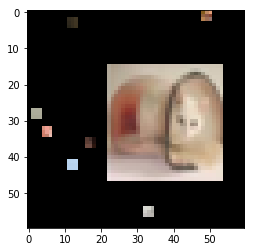

In [92]:
plt.imshow(array_train[456])

In [93]:
#### GETTING ALL THE FILENAMES #####
filenames_test = []
for file in glob.glob('test/*.png'):
    filenames_test.append(file)
    
# For storing the new transformed images
array_test = []    


####### PERFORMING THE TRANSFORMATIONS ###########



for j in range(len(filenames_test)):
   
    #Creating a 60X60 canvas and storing it as an image
    canv = np.zeros((60,60,3))
    canv3 = Image.fromarray(canv, mode = "RGB")
    
    # Loading the main image
    main_img = Image.open(filenames_test[j])
    
    #Loading 7 random images to be added as noise
    idx = random.sample(range(0, 10000), 7) 



    for i in idx:
        
        # Loading the random images for cropping 
        rand_img = Image.open(filenames_test[i])
        
        #Specifying the location where the cropping must happen
        x = random.randint(0,32)
        
        #Cropping the images
        crop1 = rand_img.crop((x,x,x+3,x+3))
   
        #Pasting the cropped portions on the canvas
        canv3.paste(crop1, (random.randint(0, 59),random.randint(0, 59)))

    #Pasting the main image on the canvas
    canv3.paste(main_img, (random.randint(0, 45),random.randint(0, 45)))
    
    #Converting to Numpy array for storage
    canv4 = np.asarray(canv3)

    array_test.append(canv4)


print("Done!")


Done!


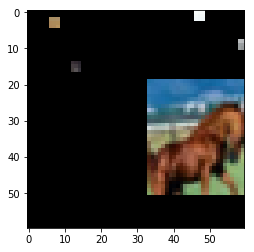

In [94]:
plt.imshow(array_test[43])

### ADDING SOME HEAVY CLUTTER ###

In [ ]:
filenames_train = []

new_train = []


# Getting the file names
for file in glob.glob('train/*.png'):
    filenames_train.append(file)
    
# Performing the transformations 
for file in filenames_train:
    #Getting the main image
    main_im = Image.open(file)
    width, height = main_im.size
    
    #Resizing the main image
    main_im = main_im.resize((width*2, height*2))
    
    #Getting the noise image
    back_im = Image.open(random.choice(filenames_train))
    wid, ht = back_im.size

    #Resizing the noise image 
    back_im = back_im.resize((wid*5, ht*5))

    #PAsting the main image on the noise image 
    back_im.paste(main_im, (np.random.randint(0,159),np.random.randint(0,159)))
    back_im3 = np.asarray(back_im)
    new_train.append(back_im3)

In [ ]:
filenames_test = []
new_test = []

for file in glob.glob('test/*.png'):
    filenames_test.append(file)
    
for file in filenames_test:
    main_im = Image.open(file)
    width, height = main_im.size
    main_im = main_im.resize((width*4, height*4))
    
    back_im = Image.open(random.choice(filenames_test))
    wid, ht = back_im.size

    back_im = back_im.resize((wid*5, ht*5))


    back_im.paste(main_im, (np.random.randint(0,159),np.random.randint(0,159)))
    back_im1 = np.asarray(back_im)

    new_test.append(back_im1)

### GETTING THE LABELS FOR TRAIN AND TEST SETS

In [95]:
#Function for getting all the characters in the file names 
def letters(input):
    valids = ""
    for character in input:
        if character.isalpha():
            valids += character
    return valids

train_labels = []
test_labels = []

#Getting the filenames in train and test sets
for f in glob.glob('train/*.png'):
    let = letters(f)
    train_labels.append(let)

for f in glob.glob('test/*.png'):
    let = letters(f)
    test_labels.append(let)
    

    

In [96]:
#Converting the labels to the numeric form 
ulab1 = list(sorted(set(train_labels)))
ulab2 = list(sorted(set(test_labels)))
num_train_labels = []
num_test_labels = []

for i in range(len(train_labels)):
    if train_labels[i] == ulab1[0]:
        num_train_labels.append(0)
        
    if train_labels[i] == ulab1[1]:
        num_train_labels.append(1)
        
    if train_labels[i] == ulab1[2]:
        num_train_labels.append(2)
        
    if train_labels[i] == ulab1[3]:
        num_train_labels.append(3)
        
    if train_labels[i] == ulab1[4]:
        num_train_labels.append(4)
        
    if train_labels[i] == ulab1[5]:
        num_train_labels.append(5)
        
    if train_labels[i] == ulab1[6]:
        num_train_labels.append(6)
        
    if train_labels[i] == ulab1[7]:
        num_train_labels.append(7)
        
    if train_labels[i] == ulab1[8]:
        num_train_labels.append(8)
        
    if train_labels[i] == ulab1[9]:
        num_train_labels.append(9)
            

for i in range(len(test_labels)):
        if test_labels[i] == ulab2[0]:
            num_test_labels.append(0)
            
        if test_labels[i] == ulab2[1]:
            num_test_labels.append(1)
            
        if test_labels[i] == ulab2[2]:
            num_test_labels.append(2)
        
        if test_labels[i] == ulab2[3]:
            num_test_labels.append(3)
            
        if test_labels[i] == ulab2[4]:
            num_test_labels.append(4)
            
        if test_labels[i] == ulab2[5]:
            num_test_labels.append(5)
            
        if test_labels[i] == ulab2[6]:
            num_test_labels.append(6)
            
        if test_labels[i] == ulab2[7]:
            num_test_labels.append(7)
            
        if test_labels[i] == ulab2[8]:
            num_test_labels.append(8)
            
        if test_labels[i] == ulab2[9]:
            num_test_labels.append(9)
    


# Saving as tfrecords

In [100]:
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [101]:
train_filename = 'cifar10_fin_cluttered_train_data.tfrecords'  # address to save the TFRecords file
# open the TFRecords file
writer = tf.python_io.TFRecordWriter(train_filename)
for i in range(len(array_train)):
    print ('Train data:',i,'out of ',len(array_train))
    sys.stdout.flush()
        
    # Load the image
    img = array_train[i]
    label = num_train_labels[i]
    # Create a feature
    feature = {'train/label': _int64_feature(np.argmax(label)),
               'train/image': _bytes_feature(tf.compat.as_bytes(img.tostring()))}
    # Create an example protocol buffer
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    
    # Serialize to string and write on the file
    writer.write(example.SerializeToString())
    
writer.close()
sys.stdout.flush()

Train data: 0 out of  50000
Train data: 1 out of  50000
Train data: 2 out of  50000
Train data: 3 out of  50000
Train data: 4 out of  50000
Train data: 5 out of  50000
Train data: 6 out of  50000
Train data: 7 out of  50000
Train data: 8 out of  50000
Train data: 9 out of  50000
Train data: 10 out of  50000
Train data: 11 out of  50000
Train data: 12 out of  50000
Train data: 13 out of  50000
Train data: 14 out of  50000
Train data: 15 out of  50000
Train data: 16 out of  50000
Train data: 17 out of  50000
Train data: 18 out of  50000
Train data: 19 out of  50000
Train data: 20 out of  50000
Train data: 21 out of  50000
Train data: 22 out of  50000
Train data: 23 out of  50000
Train data: 24 out of  50000
Train data: 25 out of  50000
Train data: 26 out of  50000
Train data: 27 out of  50000
Train data: 28 out of  50000
Train data: 29 out of  50000
Train data: 30 out of  50000
Train data: 31 out of  50000
Train data: 32 out of  50000
Train data: 33 out of  50000
Train data: 34 out of  5

Train data: 277 out of  50000
Train data: 278 out of  50000
Train data: 279 out of  50000
Train data: 280 out of  50000
Train data: 281 out of  50000
Train data: 282 out of  50000
Train data: 283 out of  50000
Train data: 284 out of  50000
Train data: 285 out of  50000
Train data: 286 out of  50000
Train data: 287 out of  50000
Train data: 288 out of  50000
Train data: 289 out of  50000
Train data: 290 out of  50000
Train data: 291 out of  50000
Train data: 292 out of  50000
Train data: 293 out of  50000
Train data: 294 out of  50000
Train data: 295 out of  50000
Train data: 296 out of  50000
Train data: 297 out of  50000
Train data: 298 out of  50000
Train data: 299 out of  50000
Train data: 300 out of  50000
Train data: 301 out of  50000
Train data: 302 out of  50000
Train data: 303 out of  50000
Train data: 304 out of  50000
Train data: 305 out of  50000
Train data: 306 out of  50000
Train data: 307 out of  50000
Train data: 308 out of  50000
Train data: 309 out of  50000
Train data

Train data: 551 out of  50000
Train data: 552 out of  50000
Train data: 553 out of  50000
Train data: 554 out of  50000
Train data: 555 out of  50000
Train data: 556 out of  50000
Train data: 557 out of  50000
Train data: 558 out of  50000
Train data: 559 out of  50000
Train data: 560 out of  50000
Train data: 561 out of  50000
Train data: 562 out of  50000
Train data: 563 out of  50000
Train data: 564 out of  50000
Train data: 565 out of  50000
Train data: 566 out of  50000
Train data: 567 out of  50000
Train data: 568 out of  50000
Train data: 569 out of  50000
Train data: 570 out of  50000
Train data: 571 out of  50000
Train data: 572 out of  50000
Train data: 573 out of  50000
Train data: 574 out of  50000
Train data: 575 out of  50000
Train data: 576 out of  50000
Train data: 577 out of  50000
Train data: 578 out of  50000
Train data: 579 out of  50000
Train data: 580 out of  50000
Train data: 581 out of  50000
Train data: 582 out of  50000
Train data: 583 out of  50000
Train data

Train data: 825 out of  50000
Train data: 826 out of  50000
Train data: 827 out of  50000
Train data: 828 out of  50000
Train data: 829 out of  50000
Train data: 830 out of  50000
Train data: 831 out of  50000
Train data: 832 out of  50000
Train data: 833 out of  50000
Train data: 834 out of  50000
Train data: 835 out of  50000
Train data: 836 out of  50000
Train data: 837 out of  50000
Train data: 838 out of  50000
Train data: 839 out of  50000
Train data: 840 out of  50000
Train data: 841 out of  50000
Train data: 842 out of  50000
Train data: 843 out of  50000
Train data: 844 out of  50000
Train data: 845 out of  50000
Train data: 846 out of  50000
Train data: 847 out of  50000
Train data: 848 out of  50000
Train data: 849 out of  50000
Train data: 850 out of  50000
Train data: 851 out of  50000
Train data: 852 out of  50000
Train data: 853 out of  50000
Train data: 854 out of  50000
Train data: 855 out of  50000
Train data: 856 out of  50000
Train data: 857 out of  50000
Train data

Train data: 1095 out of  50000
Train data: 1096 out of  50000
Train data: 1097 out of  50000
Train data: 1098 out of  50000
Train data: 1099 out of  50000
Train data: 1100 out of  50000
Train data: 1101 out of  50000
Train data: 1102 out of  50000
Train data: 1103 out of  50000
Train data: 1104 out of  50000
Train data: 1105 out of  50000
Train data: 1106 out of  50000
Train data: 1107 out of  50000
Train data: 1108 out of  50000
Train data: 1109 out of  50000
Train data: 1110 out of  50000
Train data: 1111 out of  50000
Train data: 1112 out of  50000
Train data: 1113 out of  50000
Train data: 1114 out of  50000
Train data: 1115 out of  50000
Train data: 1116 out of  50000
Train data: 1117 out of  50000
Train data: 1118 out of  50000
Train data: 1119 out of  50000
Train data: 1120 out of  50000
Train data: 1121 out of  50000
Train data: 1122 out of  50000
Train data: 1123 out of  50000
Train data: 1124 out of  50000
Train data: 1125 out of  50000
Train data: 1126 out of  50000
Train da

Train data: 1360 out of  50000
Train data: 1361 out of  50000
Train data: 1362 out of  50000
Train data: 1363 out of  50000
Train data: 1364 out of  50000
Train data: 1365 out of  50000
Train data: 1366 out of  50000
Train data: 1367 out of  50000
Train data: 1368 out of  50000
Train data: 1369 out of  50000
Train data: 1370 out of  50000
Train data: 1371 out of  50000
Train data: 1372 out of  50000
Train data: 1373 out of  50000
Train data: 1374 out of  50000
Train data: 1375 out of  50000
Train data: 1376 out of  50000
Train data: 1377 out of  50000
Train data: 1378 out of  50000
Train data: 1379 out of  50000
Train data: 1380 out of  50000
Train data: 1381 out of  50000
Train data: 1382 out of  50000
Train data: 1383 out of  50000
Train data: 1384 out of  50000
Train data: 1385 out of  50000
Train data: 1386 out of  50000
Train data: 1387 out of  50000
Train data: 1388 out of  50000
Train data: 1389 out of  50000
Train data: 1390 out of  50000
Train data: 1391 out of  50000
Train da

Train data: 1625 out of  50000
Train data: 1626 out of  50000
Train data: 1627 out of  50000
Train data: 1628 out of  50000
Train data: 1629 out of  50000
Train data: 1630 out of  50000
Train data: 1631 out of  50000
Train data: 1632 out of  50000
Train data: 1633 out of  50000
Train data: 1634 out of  50000
Train data: 1635 out of  50000
Train data: 1636 out of  50000
Train data: 1637 out of  50000
Train data: 1638 out of  50000
Train data: 1639 out of  50000
Train data: 1640 out of  50000
Train data: 1641 out of  50000
Train data: 1642 out of  50000
Train data: 1643 out of  50000
Train data: 1644 out of  50000
Train data: 1645 out of  50000
Train data: 1646 out of  50000
Train data: 1647 out of  50000
Train data: 1648 out of  50000
Train data: 1649 out of  50000
Train data: 1650 out of  50000
Train data: 1651 out of  50000
Train data: 1652 out of  50000
Train data: 1653 out of  50000
Train data: 1654 out of  50000
Train data: 1655 out of  50000
Train data: 1656 out of  50000
Train da

Train data: 1890 out of  50000
Train data: 1891 out of  50000
Train data: 1892 out of  50000
Train data: 1893 out of  50000
Train data: 1894 out of  50000
Train data: 1895 out of  50000
Train data: 1896 out of  50000
Train data: 1897 out of  50000
Train data: 1898 out of  50000
Train data: 1899 out of  50000
Train data: 1900 out of  50000
Train data: 1901 out of  50000
Train data: 1902 out of  50000
Train data: 1903 out of  50000
Train data: 1904 out of  50000
Train data: 1905 out of  50000
Train data: 1906 out of  50000
Train data: 1907 out of  50000
Train data: 1908 out of  50000
Train data: 1909 out of  50000
Train data: 1910 out of  50000
Train data: 1911 out of  50000
Train data: 1912 out of  50000
Train data: 1913 out of  50000
Train data: 1914 out of  50000
Train data: 1915 out of  50000
Train data: 1916 out of  50000
Train data: 1917 out of  50000
Train data: 1918 out of  50000
Train data: 1919 out of  50000
Train data: 1920 out of  50000
Train data: 1921 out of  50000
Train da

Train data: 2155 out of  50000
Train data: 2156 out of  50000
Train data: 2157 out of  50000
Train data: 2158 out of  50000
Train data: 2159 out of  50000
Train data: 2160 out of  50000
Train data: 2161 out of  50000
Train data: 2162 out of  50000
Train data: 2163 out of  50000
Train data: 2164 out of  50000
Train data: 2165 out of  50000
Train data: 2166 out of  50000
Train data: 2167 out of  50000
Train data: 2168 out of  50000
Train data: 2169 out of  50000
Train data: 2170 out of  50000
Train data: 2171 out of  50000
Train data: 2172 out of  50000
Train data: 2173 out of  50000
Train data: 2174 out of  50000
Train data: 2175 out of  50000
Train data: 2176 out of  50000
Train data: 2177 out of  50000
Train data: 2178 out of  50000
Train data: 2179 out of  50000
Train data: 2180 out of  50000
Train data: 2181 out of  50000
Train data: 2182 out of  50000
Train data: 2183 out of  50000
Train data: 2184 out of  50000
Train data: 2185 out of  50000
Train data: 2186 out of  50000
Train da

Train data: 2420 out of  50000
Train data: 2421 out of  50000
Train data: 2422 out of  50000
Train data: 2423 out of  50000
Train data: 2424 out of  50000
Train data: 2425 out of  50000
Train data: 2426 out of  50000
Train data: 2427 out of  50000
Train data: 2428 out of  50000
Train data: 2429 out of  50000
Train data: 2430 out of  50000
Train data: 2431 out of  50000
Train data: 2432 out of  50000
Train data: 2433 out of  50000
Train data: 2434 out of  50000
Train data: 2435 out of  50000
Train data: 2436 out of  50000
Train data: 2437 out of  50000
Train data: 2438 out of  50000
Train data: 2439 out of  50000
Train data: 2440 out of  50000
Train data: 2441 out of  50000
Train data: 2442 out of  50000
Train data: 2443 out of  50000
Train data: 2444 out of  50000
Train data: 2445 out of  50000
Train data: 2446 out of  50000
Train data: 2447 out of  50000
Train data: 2448 out of  50000
Train data: 2449 out of  50000
Train data: 2450 out of  50000
Train data: 2451 out of  50000
Train da

Train data: 2685 out of  50000
Train data: 2686 out of  50000
Train data: 2687 out of  50000
Train data: 2688 out of  50000
Train data: 2689 out of  50000
Train data: 2690 out of  50000
Train data: 2691 out of  50000
Train data: 2692 out of  50000
Train data: 2693 out of  50000
Train data: 2694 out of  50000
Train data: 2695 out of  50000
Train data: 2696 out of  50000
Train data: 2697 out of  50000
Train data: 2698 out of  50000
Train data: 2699 out of  50000
Train data: 2700 out of  50000
Train data: 2701 out of  50000
Train data: 2702 out of  50000
Train data: 2703 out of  50000
Train data: 2704 out of  50000
Train data: 2705 out of  50000
Train data: 2706 out of  50000
Train data: 2707 out of  50000
Train data: 2708 out of  50000
Train data: 2709 out of  50000
Train data: 2710 out of  50000
Train data: 2711 out of  50000
Train data: 2712 out of  50000
Train data: 2713 out of  50000
Train data: 2714 out of  50000
Train data: 2715 out of  50000
Train data: 2716 out of  50000
Train da

Train data: 2950 out of  50000
Train data: 2951 out of  50000
Train data: 2952 out of  50000
Train data: 2953 out of  50000
Train data: 2954 out of  50000
Train data: 2955 out of  50000
Train data: 2956 out of  50000
Train data: 2957 out of  50000
Train data: 2958 out of  50000
Train data: 2959 out of  50000
Train data: 2960 out of  50000
Train data: 2961 out of  50000
Train data: 2962 out of  50000
Train data: 2963 out of  50000
Train data: 2964 out of  50000
Train data: 2965 out of  50000
Train data: 2966 out of  50000


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Train data: 4014 out of  50000
Train data: 4015 out of  50000
Train data: 4016 out of  50000
Train data: 4017 out of  50000
Train data: 4018 out of  50000
Train data: 4019 out of  50000
Train data: 4020 out of  50000
Train data: 4021 out of  50000
Train data: 4022 out of  50000
Train data: 4023 out of  50000
Train data: 4024 out of  50000
Train data: 4025 out of  50000
Train data: 4026 out of  50000
Train data: 4027 out of  50000
Train data: 4028 out of  50000
Train data: 4029 out of  50000
Train data: 4030 out of  50000
Train data: 4031 out of  50000
Train data: 4032 out of  50000
Train data: 4033 out of  50000
Train data: 4034 out of  50000
Train data: 4035 out of  50000
Train data: 4036 out of  50000
Train data: 4037 out of  50000
Train data: 4038 out of  50000
Train data: 4039 out of  50000
Train data: 4040 out of  50000
Train data: 4041 out of  50000
Train data: 4042 out of  50000
Train data: 4043 out of  50000
Train data: 4044 out of  50000
Train data: 4045 out of  50000
Train da

Train data: 4279 out of  50000
Train data: 4280 out of  50000
Train data: 4281 out of  50000
Train data: 4282 out of  50000
Train data: 4283 out of  50000
Train data: 4284 out of  50000
Train data: 4285 out of  50000
Train data: 4286 out of  50000
Train data: 4287 out of  50000
Train data: 4288 out of  50000
Train data: 4289 out of  50000
Train data: 4290 out of  50000
Train data: 4291 out of  50000
Train data: 4292 out of  50000
Train data: 4293 out of  50000
Train data: 4294 out of  50000
Train data: 4295 out of  50000
Train data: 4296 out of  50000
Train data: 4297 out of  50000
Train data: 4298 out of  50000
Train data: 4299 out of  50000
Train data: 4300 out of  50000
Train data: 4301 out of  50000
Train data: 4302 out of  50000
Train data: 4303 out of  50000
Train data: 4304 out of  50000
Train data: 4305 out of  50000
Train data: 4306 out of  50000
Train data: 4307 out of  50000
Train data: 4308 out of  50000
Train data: 4309 out of  50000
Train data: 4310 out of  50000
Train da

Train data: 4544 out of  50000
Train data: 4545 out of  50000
Train data: 4546 out of  50000
Train data: 4547 out of  50000
Train data: 4548 out of  50000
Train data: 4549 out of  50000
Train data: 4550 out of  50000
Train data: 4551 out of  50000
Train data: 4552 out of  50000
Train data: 4553 out of  50000
Train data: 4554 out of  50000
Train data: 4555 out of  50000
Train data: 4556 out of  50000
Train data: 4557 out of  50000
Train data: 4558 out of  50000
Train data: 4559 out of  50000
Train data: 4560 out of  50000
Train data: 4561 out of  50000
Train data: 4562 out of  50000
Train data: 4563 out of  50000
Train data: 4564 out of  50000
Train data: 4565 out of  50000
Train data: 4566 out of  50000
Train data: 4567 out of  50000
Train data: 4568 out of  50000
Train data: 4569 out of  50000
Train data: 4570 out of  50000
Train data: 4571 out of  50000
Train data: 4572 out of  50000
Train data: 4573 out of  50000
Train data: 4574 out of  50000
Train data: 4575 out of  50000
Train da

Train data: 4809 out of  50000
Train data: 4810 out of  50000
Train data: 4811 out of  50000
Train data: 4812 out of  50000
Train data: 4813 out of  50000
Train data: 4814 out of  50000
Train data: 4815 out of  50000
Train data: 4816 out of  50000
Train data: 4817 out of  50000
Train data: 4818 out of  50000
Train data: 4819 out of  50000
Train data: 4820 out of  50000
Train data: 4821 out of  50000
Train data: 4822 out of  50000
Train data: 4823 out of  50000
Train data: 4824 out of  50000
Train data: 4825 out of  50000
Train data: 4826 out of  50000
Train data: 4827 out of  50000
Train data: 4828 out of  50000
Train data: 4829 out of  50000
Train data: 4830 out of  50000
Train data: 4831 out of  50000
Train data: 4832 out of  50000
Train data: 4833 out of  50000
Train data: 4834 out of  50000
Train data: 4835 out of  50000
Train data: 4836 out of  50000
Train data: 4837 out of  50000
Train data: 4838 out of  50000
Train data: 4839 out of  50000
Train data: 4840 out of  50000
Train da

Train data: 5074 out of  50000
Train data: 5075 out of  50000
Train data: 5076 out of  50000
Train data: 5077 out of  50000
Train data: 5078 out of  50000
Train data: 5079 out of  50000
Train data: 5080 out of  50000
Train data: 5081 out of  50000
Train data: 5082 out of  50000
Train data: 5083 out of  50000
Train data: 5084 out of  50000
Train data: 5085 out of  50000
Train data: 5086 out of  50000
Train data: 5087 out of  50000
Train data: 5088 out of  50000
Train data: 5089 out of  50000
Train data: 5090 out of  50000
Train data: 5091 out of  50000
Train data: 5092 out of  50000
Train data: 5093 out of  50000
Train data: 5094 out of  50000
Train data: 5095 out of  50000
Train data: 5096 out of  50000
Train data: 5097 out of  50000
Train data: 5098 out of  50000
Train data: 5099 out of  50000
Train data: 5100 out of  50000
Train data: 5101 out of  50000
Train data: 5102 out of  50000
Train data: 5103 out of  50000
Train data: 5104 out of  50000
Train data: 5105 out of  50000
Train da

Train data: 5339 out of  50000
Train data: 5340 out of  50000
Train data: 5341 out of  50000
Train data: 5342 out of  50000
Train data: 5343 out of  50000
Train data: 5344 out of  50000
Train data: 5345 out of  50000
Train data: 5346 out of  50000
Train data: 5347 out of  50000
Train data: 5348 out of  50000
Train data: 5349 out of  50000
Train data: 5350 out of  50000
Train data: 5351 out of  50000
Train data: 5352 out of  50000
Train data: 5353 out of  50000
Train data: 5354 out of  50000
Train data: 5355 out of  50000
Train data: 5356 out of  50000
Train data: 5357 out of  50000
Train data: 5358 out of  50000
Train data: 5359 out of  50000
Train data: 5360 out of  50000
Train data: 5361 out of  50000
Train data: 5362 out of  50000
Train data: 5363 out of  50000
Train data: 5364 out of  50000
Train data: 5365 out of  50000
Train data: 5366 out of  50000
Train data: 5367 out of  50000
Train data: 5368 out of  50000
Train data: 5369 out of  50000
Train data: 5370 out of  50000
Train da

Train data: 5604 out of  50000
Train data: 5605 out of  50000
Train data: 5606 out of  50000
Train data: 5607 out of  50000
Train data: 5608 out of  50000
Train data: 5609 out of  50000
Train data: 5610 out of  50000
Train data: 5611 out of  50000
Train data: 5612 out of  50000
Train data: 5613 out of  50000
Train data: 5614 out of  50000
Train data: 5615 out of  50000
Train data: 5616 out of  50000
Train data: 5617 out of  50000
Train data: 5618 out of  50000
Train data: 5619 out of  50000
Train data: 5620 out of  50000
Train data: 5621 out of  50000
Train data: 5622 out of  50000
Train data: 5623 out of  50000
Train data: 5624 out of  50000
Train data: 5625 out of  50000
Train data: 5626 out of  50000
Train data: 5627 out of  50000
Train data: 5628 out of  50000
Train data: 5629 out of  50000
Train data: 5630 out of  50000
Train data: 5631 out of  50000
Train data: 5632 out of  50000
Train data: 5633 out of  50000
Train data: 5634 out of  50000
Train data: 5635 out of  50000
Train da

Train data: 5869 out of  50000
Train data: 5870 out of  50000
Train data: 5871 out of  50000
Train data: 5872 out of  50000
Train data: 5873 out of  50000
Train data: 5874 out of  50000
Train data: 5875 out of  50000
Train data: 5876 out of  50000
Train data: 5877 out of  50000
Train data: 5878 out of  50000
Train data: 5879 out of  50000
Train data: 5880 out of  50000
Train data: 5881 out of  50000
Train data: 5882 out of  50000
Train data: 5883 out of  50000
Train data: 5884 out of  50000
Train data: 5885 out of  50000
Train data: 5886 out of  50000
Train data: 5887 out of  50000
Train data: 5888 out of  50000
Train data: 5889 out of  50000
Train data: 5890 out of  50000
Train data: 5891 out of  50000
Train data: 5892 out of  50000
Train data: 5893 out of  50000
Train data: 5894 out of  50000
Train data: 5895 out of  50000
Train data: 5896 out of  50000
Train data: 5897 out of  50000
Train data: 5898 out of  50000
Train data: 5899 out of  50000
Train data: 5900 out of  50000
Train da

Train data: 6134 out of  50000
Train data: 6135 out of  50000
Train data: 6136 out of  50000
Train data: 6137 out of  50000
Train data: 6138 out of  50000
Train data: 6139 out of  50000
Train data: 6140 out of  50000
Train data: 6141 out of  50000
Train data: 6142 out of  50000
Train data: 6143 out of  50000
Train data: 6144 out of  50000
Train data: 6145 out of  50000
Train data: 6146 out of  50000
Train data: 6147 out of  50000
Train data: 6148 out of  50000
Train data: 6149 out of  50000
Train data: 6150 out of  50000
Train data: 6151 out of  50000
Train data: 6152 out of  50000
Train data: 6153 out of  50000
Train data: 6154 out of  50000
Train data: 6155 out of  50000
Train data: 6156 out of  50000
Train data: 6157 out of  50000
Train data: 6158 out of  50000
Train data: 6159 out of  50000
Train data: 6160 out of  50000
Train data: 6161 out of  50000
Train data: 6162 out of  50000
Train data: 6163 out of  50000
Train data: 6164 out of  50000
Train data: 6165 out of  50000
Train da

Train data: 6399 out of  50000
Train data: 6400 out of  50000
Train data: 6401 out of  50000
Train data: 6402 out of  50000
Train data: 6403 out of  50000
Train data: 6404 out of  50000
Train data: 6405 out of  50000
Train data: 6406 out of  50000
Train data: 6407 out of  50000
Train data: 6408 out of  50000
Train data: 6409 out of  50000
Train data: 6410 out of  50000
Train data: 6411 out of  50000
Train data: 6412 out of  50000
Train data: 6413 out of  50000
Train data: 6414 out of  50000
Train data: 6415 out of  50000
Train data: 6416 out of  50000
Train data: 6417 out of  50000
Train data: 6418 out of  50000
Train data: 6419 out of  50000
Train data: 6420 out of  50000
Train data: 6421 out of  50000
Train data: 6422 out of  50000
Train data: 6423 out of  50000
Train data: 6424 out of  50000
Train data: 6425 out of  50000
Train data: 6426 out of  50000
Train data: 6427 out of  50000
Train data: 6428 out of  50000
Train data: 6429 out of  50000
Train data: 6430 out of  50000
Train da

Train data: 6664 out of  50000
Train data: 6665 out of  50000
Train data: 6666 out of  50000
Train data: 6667 out of  50000
Train data: 6668 out of  50000
Train data: 6669 out of  50000
Train data: 6670 out of  50000
Train data: 6671 out of  50000
Train data: 6672 out of  50000
Train data: 6673 out of  50000
Train data: 6674 out of  50000
Train data: 6675 out of  50000
Train data: 6676 out of  50000
Train data: 6677 out of  50000
Train data: 6678 out of  50000
Train data: 6679 out of  50000
Train data: 6680 out of  50000
Train data: 6681 out of  50000
Train data: 6682 out of  50000
Train data: 6683 out of  50000
Train data: 6684 out of  50000
Train data: 6685 out of  50000
Train data: 6686 out of  50000
Train data: 6687 out of  50000
Train data: 6688 out of  50000
Train data: 6689 out of  50000
Train data: 6690 out of  50000
Train data: 6691 out of  50000
Train data: 6692 out of  50000
Train data: 6693 out of  50000
Train data: 6694 out of  50000
Train data: 6695 out of  50000
Train da

Train data: 6929 out of  50000
Train data: 6930 out of  50000
Train data: 6931 out of  50000
Train data: 6932 out of  50000
Train data: 6933 out of  50000
Train data: 6934 out of  50000
Train data: 6935 out of  50000
Train data: 6936 out of  50000
Train data: 6937 out of  50000
Train data: 6938 out of  50000
Train data: 6939 out of  50000
Train data: 6940 out of  50000
Train data: 6941 out of  50000
Train data: 6942 out of  50000
Train data: 6943 out of  50000
Train data: 6944 out of  50000
Train data: 6945 out of  50000
Train data: 6946 out of  50000
Train data: 6947 out of  50000
Train data: 6948 out of  50000
Train data: 6949 out of  50000
Train data: 6950 out of  50000
Train data: 6951 out of  50000
Train data: 6952 out of  50000
Train data: 6953 out of  50000
Train data: 6954 out of  50000
Train data: 6955 out of  50000
Train data: 6956 out of  50000
Train data: 6957 out of  50000
Train data: 6958 out of  50000
Train data: 6959 out of  50000
Train data: 6960 out of  50000
Train da

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Train data: 8110 out of  50000
Train data: 8111 out of  50000
Train data: 8112 out of  50000
Train data: 8113 out of  50000
Train data: 8114 out of  50000
Train data: 8115 out of  50000
Train data: 8116 out of  50000
Train data: 8117 out of  50000
Train data: 8118 out of  50000
Train data: 8119 out of  50000
Train data: 8120 out of  50000
Train data: 8121 out of  50000
Train data: 8122 out of  50000
Train data: 8123 out of  50000
Train data: 8124 out of  50000
Train data: 8125 out of  50000
Train data: 8126 out of  50000
Train data: 8127 out of  50000
Train data: 8128 out of  50000
Train data: 8129 out of  50000
Train data: 8130 out of  50000
Train data: 8131 out of  50000
Train data: 8132 out of  50000
Train data: 8133 out of  50000
Train data: 8134 out of  50000
Train data: 8135 out of  50000
Train data: 8136 out of  50000
Train data: 8137 out of  50000
Train data: 8138 out of  50000
Train data: 8139 out of  50000
Train data: 8140 out of  50000
Train data: 8141 out of  50000
Train da

Train data: 8375 out of  50000
Train data: 8376 out of  50000
Train data: 8377 out of  50000
Train data: 8378 out of  50000
Train data: 8379 out of  50000
Train data: 8380 out of  50000
Train data: 8381 out of  50000
Train data: 8382 out of  50000
Train data: 8383 out of  50000
Train data: 8384 out of  50000
Train data: 8385 out of  50000
Train data: 8386 out of  50000
Train data: 8387 out of  50000
Train data: 8388 out of  50000
Train data: 8389 out of  50000
Train data: 8390 out of  50000
Train data: 8391 out of  50000
Train data: 8392 out of  50000
Train data: 8393 out of  50000
Train data: 8394 out of  50000
Train data: 8395 out of  50000
Train data: 8396 out of  50000
Train data: 8397 out of  50000
Train data: 8398 out of  50000
Train data: 8399 out of  50000
Train data: 8400 out of  50000
Train data: 8401 out of  50000
Train data: 8402 out of  50000
Train data: 8403 out of  50000
Train data: 8404 out of  50000
Train data: 8405 out of  50000
Train data: 8406 out of  50000
Train da

Train data: 8640 out of  50000
Train data: 8641 out of  50000
Train data: 8642 out of  50000
Train data: 8643 out of  50000
Train data: 8644 out of  50000
Train data: 8645 out of  50000
Train data: 8646 out of  50000
Train data: 8647 out of  50000
Train data: 8648 out of  50000
Train data: 8649 out of  50000
Train data: 8650 out of  50000
Train data: 8651 out of  50000
Train data: 8652 out of  50000
Train data: 8653 out of  50000
Train data: 8654 out of  50000
Train data: 8655 out of  50000
Train data: 8656 out of  50000
Train data: 8657 out of  50000
Train data: 8658 out of  50000
Train data: 8659 out of  50000
Train data: 8660 out of  50000
Train data: 8661 out of  50000
Train data: 8662 out of  50000
Train data: 8663 out of  50000
Train data: 8664 out of  50000
Train data: 8665 out of  50000
Train data: 8666 out of  50000
Train data: 8667 out of  50000
Train data: 8668 out of  50000
Train data: 8669 out of  50000
Train data: 8670 out of  50000
Train data: 8671 out of  50000
Train da

Train data: 8905 out of  50000
Train data: 8906 out of  50000
Train data: 8907 out of  50000
Train data: 8908 out of  50000
Train data: 8909 out of  50000
Train data: 8910 out of  50000
Train data: 8911 out of  50000
Train data: 8912 out of  50000
Train data: 8913 out of  50000
Train data: 8914 out of  50000
Train data: 8915 out of  50000
Train data: 8916 out of  50000
Train data: 8917 out of  50000
Train data: 8918 out of  50000
Train data: 8919 out of  50000
Train data: 8920 out of  50000
Train data: 8921 out of  50000
Train data: 8922 out of  50000
Train data: 8923 out of  50000
Train data: 8924 out of  50000
Train data: 8925 out of  50000
Train data: 8926 out of  50000
Train data: 8927 out of  50000
Train data: 8928 out of  50000
Train data: 8929 out of  50000
Train data: 8930 out of  50000
Train data: 8931 out of  50000
Train data: 8932 out of  50000
Train data: 8933 out of  50000
Train data: 8934 out of  50000
Train data: 8935 out of  50000
Train data: 8936 out of  50000
Train da

Train data: 9170 out of  50000
Train data: 9171 out of  50000
Train data: 9172 out of  50000
Train data: 9173 out of  50000
Train data: 9174 out of  50000
Train data: 9175 out of  50000
Train data: 9176 out of  50000
Train data: 9177 out of  50000
Train data: 9178 out of  50000
Train data: 9179 out of  50000
Train data: 9180 out of  50000
Train data: 9181 out of  50000
Train data: 9182 out of  50000
Train data: 9183 out of  50000
Train data: 9184 out of  50000
Train data: 9185 out of  50000
Train data: 9186 out of  50000
Train data: 9187 out of  50000
Train data: 9188 out of  50000
Train data: 9189 out of  50000
Train data: 9190 out of  50000
Train data: 9191 out of  50000
Train data: 9192 out of  50000
Train data: 9193 out of  50000
Train data: 9194 out of  50000
Train data: 9195 out of  50000
Train data: 9196 out of  50000
Train data: 9197 out of  50000
Train data: 9198 out of  50000
Train data: 9199 out of  50000
Train data: 9200 out of  50000
Train data: 9201 out of  50000
Train da

Train data: 9435 out of  50000
Train data: 9436 out of  50000
Train data: 9437 out of  50000
Train data: 9438 out of  50000
Train data: 9439 out of  50000
Train data: 9440 out of  50000
Train data: 9441 out of  50000
Train data: 9442 out of  50000
Train data: 9443 out of  50000
Train data: 9444 out of  50000
Train data: 9445 out of  50000
Train data: 9446 out of  50000
Train data: 9447 out of  50000
Train data: 9448 out of  50000
Train data: 9449 out of  50000
Train data: 9450 out of  50000
Train data: 9451 out of  50000
Train data: 9452 out of  50000
Train data: 9453 out of  50000
Train data: 9454 out of  50000
Train data: 9455 out of  50000
Train data: 9456 out of  50000
Train data: 9457 out of  50000
Train data: 9458 out of  50000
Train data: 9459 out of  50000
Train data: 9460 out of  50000
Train data: 9461 out of  50000
Train data: 9462 out of  50000
Train data: 9463 out of  50000
Train data: 9464 out of  50000
Train data: 9465 out of  50000
Train data: 9466 out of  50000
Train da

Train data: 9700 out of  50000
Train data: 9701 out of  50000
Train data: 9702 out of  50000
Train data: 9703 out of  50000
Train data: 9704 out of  50000
Train data: 9705 out of  50000
Train data: 9706 out of  50000
Train data: 9707 out of  50000
Train data: 9708 out of  50000
Train data: 9709 out of  50000
Train data: 9710 out of  50000
Train data: 9711 out of  50000
Train data: 9712 out of  50000
Train data: 9713 out of  50000
Train data: 9714 out of  50000
Train data: 9715 out of  50000
Train data: 9716 out of  50000
Train data: 9717 out of  50000
Train data: 9718 out of  50000
Train data: 9719 out of  50000
Train data: 9720 out of  50000
Train data: 9721 out of  50000
Train data: 9722 out of  50000
Train data: 9723 out of  50000
Train data: 9724 out of  50000
Train data: 9725 out of  50000
Train data: 9726 out of  50000
Train data: 9727 out of  50000
Train data: 9728 out of  50000
Train data: 9729 out of  50000
Train data: 9730 out of  50000
Train data: 9731 out of  50000
Train da

Train data: 9965 out of  50000
Train data: 9966 out of  50000
Train data: 9967 out of  50000
Train data: 9968 out of  50000
Train data: 9969 out of  50000
Train data: 9970 out of  50000
Train data: 9971 out of  50000
Train data: 9972 out of  50000
Train data: 9973 out of  50000
Train data: 9974 out of  50000
Train data: 9975 out of  50000
Train data: 9976 out of  50000
Train data: 9977 out of  50000
Train data: 9978 out of  50000
Train data: 9979 out of  50000
Train data: 9980 out of  50000
Train data: 9981 out of  50000
Train data: 9982 out of  50000
Train data: 9983 out of  50000
Train data: 9984 out of  50000
Train data: 9985 out of  50000
Train data: 9986 out of  50000
Train data: 9987 out of  50000
Train data: 9988 out of  50000
Train data: 9989 out of  50000
Train data: 9990 out of  50000
Train data: 9991 out of  50000
Train data: 9992 out of  50000
Train data: 9993 out of  50000
Train data: 9994 out of  50000
Train data: 9995 out of  50000
Train data: 9996 out of  50000
Train da

Train data: 10223 out of  50000
Train data: 10224 out of  50000
Train data: 10225 out of  50000
Train data: 10226 out of  50000
Train data: 10227 out of  50000
Train data: 10228 out of  50000
Train data: 10229 out of  50000
Train data: 10230 out of  50000
Train data: 10231 out of  50000
Train data: 10232 out of  50000
Train data: 10233 out of  50000
Train data: 10234 out of  50000
Train data: 10235 out of  50000
Train data: 10236 out of  50000
Train data: 10237 out of  50000
Train data: 10238 out of  50000
Train data: 10239 out of  50000
Train data: 10240 out of  50000
Train data: 10241 out of  50000
Train data: 10242 out of  50000
Train data: 10243 out of  50000
Train data: 10244 out of  50000
Train data: 10245 out of  50000
Train data: 10246 out of  50000
Train data: 10247 out of  50000
Train data: 10248 out of  50000
Train data: 10249 out of  50000
Train data: 10250 out of  50000
Train data: 10251 out of  50000
Train data: 10252 out of  50000
Train data: 10253 out of  50000
Train da

Train data: 10480 out of  50000
Train data: 10481 out of  50000
Train data: 10482 out of  50000
Train data: 10483 out of  50000
Train data: 10484 out of  50000
Train data: 10485 out of  50000
Train data: 10486 out of  50000
Train data: 10487 out of  50000
Train data: 10488 out of  50000
Train data: 10489 out of  50000
Train data: 10490 out of  50000
Train data: 10491 out of  50000
Train data: 10492 out of  50000
Train data: 10493 out of  50000
Train data: 10494 out of  50000
Train data: 10495 out of  50000
Train data: 10496 out of  50000
Train data: 10497 out of  50000
Train data: 10498 out of  50000
Train data: 10499 out of  50000
Train data: 10500 out of  50000
Train data: 10501 out of  50000
Train data: 10502 out of  50000
Train data: 10503 out of  50000
Train data: 10504 out of  50000
Train data: 10505 out of  50000
Train data: 10506 out of  50000
Train data: 10507 out of  50000
Train data: 10508 out of  50000
Train data: 10509 out of  50000
Train data: 10510 out of  50000
Train da

Train data: 10737 out of  50000
Train data: 10738 out of  50000
Train data: 10739 out of  50000
Train data: 10740 out of  50000
Train data: 10741 out of  50000
Train data: 10742 out of  50000
Train data: 10743 out of  50000
Train data: 10744 out of  50000
Train data: 10745 out of  50000
Train data: 10746 out of  50000
Train data: 10747 out of  50000
Train data: 10748 out of  50000
Train data: 10749 out of  50000
Train data: 10750 out of  50000
Train data: 10751 out of  50000
Train data: 10752 out of  50000
Train data: 10753 out of  50000
Train data: 10754 out of  50000
Train data: 10755 out of  50000
Train data: 10756 out of  50000
Train data: 10757 out of  50000
Train data: 10758 out of  50000
Train data: 10759 out of  50000
Train data: 10760 out of  50000
Train data: 10761 out of  50000
Train data: 10762 out of  50000
Train data: 10763 out of  50000
Train data: 10764 out of  50000
Train data: 10765 out of  50000
Train data: 10766 out of  50000
Train data: 10767 out of  50000
Train da

Train data: 10994 out of  50000
Train data: 10995 out of  50000
Train data: 10996 out of  50000
Train data: 10997 out of  50000
Train data: 10998 out of  50000
Train data: 10999 out of  50000
Train data: 11000 out of  50000
Train data: 11001 out of  50000
Train data: 11002 out of  50000
Train data: 11003 out of  50000
Train data: 11004 out of  50000
Train data: 11005 out of  50000
Train data: 11006 out of  50000
Train data: 11007 out of  50000
Train data: 11008 out of  50000
Train data: 11009 out of  50000
Train data: 11010 out of  50000
Train data: 11011 out of  50000
Train data: 11012 out of  50000
Train data: 11013 out of  50000
Train data: 11014 out of  50000
Train data: 11015 out of  50000
Train data: 11016 out of  50000
Train data: 11017 out of  50000
Train data: 11018 out of  50000
Train data: 11019 out of  50000
Train data: 11020 out of  50000
Train data: 11021 out of  50000
Train data: 11022 out of  50000
Train data: 11023 out of  50000
Train data: 11024 out of  50000
Train da

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Train data: 12223 out of  50000
Train data: 12224 out of  50000
Train data: 12225 out of  50000
Train data: 12226 out of  50000
Train data: 12227 out of  50000
Train data: 12228 out of  50000
Train data: 12229 out of  50000
Train data: 12230 out of  50000
Train data: 12231 out of  50000
Train data: 12232 out of  50000
Train data: 12233 out of  50000
Train data: 12234 out of  50000
Train data: 12235 out of  50000
Train data: 12236 out of  50000
Train data: 12237 out of  50000
Train data: 12238 out of  50000
Train data: 12239 out of  50000
Train data: 12240 out of  50000
Train data: 12241 out of  50000
Train data: 12242 out of  50000
Train data: 12243 out of  50000
Train data: 12244 out of  50000
Train data: 12245 out of  50000
Train data: 12246 out of  50000
Train data: 12247 out of  50000
Train data: 12248 out of  50000
Train data: 12249 out of  50000
Train data: 12250 out of  50000
Train data: 12251 out of  50000
Train data: 12252 out of  50000
Train data: 12253 out of  50000
Train da

Train data: 12480 out of  50000
Train data: 12481 out of  50000
Train data: 12482 out of  50000
Train data: 12483 out of  50000
Train data: 12484 out of  50000
Train data: 12485 out of  50000
Train data: 12486 out of  50000
Train data: 12487 out of  50000
Train data: 12488 out of  50000
Train data: 12489 out of  50000
Train data: 12490 out of  50000
Train data: 12491 out of  50000
Train data: 12492 out of  50000
Train data: 12493 out of  50000
Train data: 12494 out of  50000
Train data: 12495 out of  50000
Train data: 12496 out of  50000
Train data: 12497 out of  50000
Train data: 12498 out of  50000
Train data: 12499 out of  50000
Train data: 12500 out of  50000
Train data: 12501 out of  50000
Train data: 12502 out of  50000
Train data: 12503 out of  50000
Train data: 12504 out of  50000
Train data: 12505 out of  50000
Train data: 12506 out of  50000
Train data: 12507 out of  50000
Train data: 12508 out of  50000
Train data: 12509 out of  50000
Train data: 12510 out of  50000
Train da

Train data: 12737 out of  50000
Train data: 12738 out of  50000
Train data: 12739 out of  50000
Train data: 12740 out of  50000
Train data: 12741 out of  50000
Train data: 12742 out of  50000
Train data: 12743 out of  50000
Train data: 12744 out of  50000
Train data: 12745 out of  50000
Train data: 12746 out of  50000
Train data: 12747 out of  50000
Train data: 12748 out of  50000
Train data: 12749 out of  50000
Train data: 12750 out of  50000
Train data: 12751 out of  50000
Train data: 12752 out of  50000
Train data: 12753 out of  50000
Train data: 12754 out of  50000
Train data: 12755 out of  50000
Train data: 12756 out of  50000
Train data: 12757 out of  50000
Train data: 12758 out of  50000
Train data: 12759 out of  50000
Train data: 12760 out of  50000
Train data: 12761 out of  50000
Train data: 12762 out of  50000
Train data: 12763 out of  50000
Train data: 12764 out of  50000
Train data: 12765 out of  50000
Train data: 12766 out of  50000
Train data: 12767 out of  50000
Train da

Train data: 12994 out of  50000
Train data: 12995 out of  50000
Train data: 12996 out of  50000
Train data: 12997 out of  50000
Train data: 12998 out of  50000
Train data: 12999 out of  50000
Train data: 13000 out of  50000
Train data: 13001 out of  50000
Train data: 13002 out of  50000
Train data: 13003 out of  50000
Train data: 13004 out of  50000
Train data: 13005 out of  50000
Train data: 13006 out of  50000
Train data: 13007 out of  50000
Train data: 13008 out of  50000
Train data: 13009 out of  50000
Train data: 13010 out of  50000
Train data: 13011 out of  50000
Train data: 13012 out of  50000
Train data: 13013 out of  50000
Train data: 13014 out of  50000
Train data: 13015 out of  50000
Train data: 13016 out of  50000
Train data: 13017 out of  50000
Train data: 13018 out of  50000
Train data: 13019 out of  50000
Train data: 13020 out of  50000
Train data: 13021 out of  50000
Train data: 13022 out of  50000
Train data: 13023 out of  50000
Train data: 13024 out of  50000
Train da

Train data: 13251 out of  50000
Train data: 13252 out of  50000
Train data: 13253 out of  50000
Train data: 13254 out of  50000
Train data: 13255 out of  50000
Train data: 13256 out of  50000
Train data: 13257 out of  50000
Train data: 13258 out of  50000
Train data: 13259 out of  50000
Train data: 13260 out of  50000
Train data: 13261 out of  50000
Train data: 13262 out of  50000
Train data: 13263 out of  50000
Train data: 13264 out of  50000
Train data: 13265 out of  50000
Train data: 13266 out of  50000
Train data: 13267 out of  50000
Train data: 13268 out of  50000
Train data: 13269 out of  50000
Train data: 13270 out of  50000
Train data: 13271 out of  50000
Train data: 13272 out of  50000
Train data: 13273 out of  50000
Train data: 13274 out of  50000
Train data: 13275 out of  50000
Train data: 13276 out of  50000
Train data: 13277 out of  50000
Train data: 13278 out of  50000
Train data: 13279 out of  50000
Train data: 13280 out of  50000
Train data: 13281 out of  50000
Train da

Train data: 13508 out of  50000
Train data: 13509 out of  50000
Train data: 13510 out of  50000
Train data: 13511 out of  50000
Train data: 13512 out of  50000
Train data: 13513 out of  50000
Train data: 13514 out of  50000
Train data: 13515 out of  50000
Train data: 13516 out of  50000
Train data: 13517 out of  50000
Train data: 13518 out of  50000
Train data: 13519 out of  50000
Train data: 13520 out of  50000
Train data: 13521 out of  50000
Train data: 13522 out of  50000
Train data: 13523 out of  50000
Train data: 13524 out of  50000
Train data: 13525 out of  50000
Train data: 13526 out of  50000
Train data: 13527 out of  50000
Train data: 13528 out of  50000
Train data: 13529 out of  50000
Train data: 13530 out of  50000
Train data: 13531 out of  50000
Train data: 13532 out of  50000
Train data: 13533 out of  50000
Train data: 13534 out of  50000
Train data: 13535 out of  50000
Train data: 13536 out of  50000
Train data: 13537 out of  50000
Train data: 13538 out of  50000
Train da

Train data: 13765 out of  50000
Train data: 13766 out of  50000
Train data: 13767 out of  50000
Train data: 13768 out of  50000
Train data: 13769 out of  50000
Train data: 13770 out of  50000
Train data: 13771 out of  50000
Train data: 13772 out of  50000
Train data: 13773 out of  50000
Train data: 13774 out of  50000
Train data: 13775 out of  50000
Train data: 13776 out of  50000
Train data: 13777 out of  50000
Train data: 13778 out of  50000
Train data: 13779 out of  50000
Train data: 13780 out of  50000
Train data: 13781 out of  50000
Train data: 13782 out of  50000
Train data: 13783 out of  50000
Train data: 13784 out of  50000
Train data: 13785 out of  50000
Train data: 13786 out of  50000
Train data: 13787 out of  50000
Train data: 13788 out of  50000
Train data: 13789 out of  50000
Train data: 13790 out of  50000
Train data: 13791 out of  50000
Train data: 13792 out of  50000
Train data: 13793 out of  50000
Train data: 13794 out of  50000
Train data: 13795 out of  50000
Train da

Train data: 14022 out of  50000
Train data: 14023 out of  50000
Train data: 14024 out of  50000
Train data: 14025 out of  50000
Train data: 14026 out of  50000
Train data: 14027 out of  50000
Train data: 14028 out of  50000
Train data: 14029 out of  50000
Train data: 14030 out of  50000
Train data: 14031 out of  50000
Train data: 14032 out of  50000
Train data: 14033 out of  50000
Train data: 14034 out of  50000
Train data: 14035 out of  50000
Train data: 14036 out of  50000
Train data: 14037 out of  50000
Train data: 14038 out of  50000
Train data: 14039 out of  50000
Train data: 14040 out of  50000
Train data: 14041 out of  50000
Train data: 14042 out of  50000
Train data: 14043 out of  50000
Train data: 14044 out of  50000
Train data: 14045 out of  50000
Train data: 14046 out of  50000
Train data: 14047 out of  50000
Train data: 14048 out of  50000
Train data: 14049 out of  50000
Train data: 14050 out of  50000
Train data: 14051 out of  50000
Train data: 14052 out of  50000
Train da

Train data: 14279 out of  50000
Train data: 14280 out of  50000
Train data: 14281 out of  50000
Train data: 14282 out of  50000
Train data: 14283 out of  50000
Train data: 14284 out of  50000
Train data: 14285 out of  50000
Train data: 14286 out of  50000
Train data: 14287 out of  50000
Train data: 14288 out of  50000
Train data: 14289 out of  50000
Train data: 14290 out of  50000
Train data: 14291 out of  50000
Train data: 14292 out of  50000
Train data: 14293 out of  50000
Train data: 14294 out of  50000
Train data: 14295 out of  50000
Train data: 14296 out of  50000
Train data: 14297 out of  50000
Train data: 14298 out of  50000
Train data: 14299 out of  50000
Train data: 14300 out of  50000
Train data: 14301 out of  50000
Train data: 14302 out of  50000
Train data: 14303 out of  50000
Train data: 14304 out of  50000
Train data: 14305 out of  50000
Train data: 14306 out of  50000
Train data: 14307 out of  50000
Train data: 14308 out of  50000
Train data: 14309 out of  50000
Train da

Train data: 14536 out of  50000
Train data: 14537 out of  50000
Train data: 14538 out of  50000
Train data: 14539 out of  50000
Train data: 14540 out of  50000
Train data: 14541 out of  50000
Train data: 14542 out of  50000
Train data: 14543 out of  50000
Train data: 14544 out of  50000
Train data: 14545 out of  50000
Train data: 14546 out of  50000
Train data: 14547 out of  50000
Train data: 14548 out of  50000
Train data: 14549 out of  50000
Train data: 14550 out of  50000
Train data: 14551 out of  50000
Train data: 14552 out of  50000
Train data: 14553 out of  50000
Train data: 14554 out of  50000
Train data: 14555 out of  50000
Train data: 14556 out of  50000
Train data: 14557 out of  50000
Train data: 14558 out of  50000
Train data: 14559 out of  50000
Train data: 14560 out of  50000
Train data: 14561 out of  50000
Train data: 14562 out of  50000
Train data: 14563 out of  50000
Train data: 14564 out of  50000
Train data: 14565 out of  50000
Train data: 14566 out of  50000
Train da

Train data: 14793 out of  50000
Train data: 14794 out of  50000
Train data: 14795 out of  50000
Train data: 14796 out of  50000
Train data: 14797 out of  50000
Train data: 14798 out of  50000
Train data: 14799 out of  50000
Train data: 14800 out of  50000
Train data: 14801 out of  50000
Train data: 14802 out of  50000
Train data: 14803 out of  50000
Train data: 14804 out of  50000
Train data: 14805 out of  50000
Train data: 14806 out of  50000
Train data: 14807 out of  50000
Train data: 14808 out of  50000
Train data: 14809 out of  50000
Train data: 14810 out of  50000
Train data: 14811 out of  50000
Train data: 14812 out of  50000
Train data: 14813 out of  50000
Train data: 14814 out of  50000
Train data: 14815 out of  50000
Train data: 14816 out of  50000
Train data: 14817 out of  50000
Train data: 14818 out of  50000
Train data: 14819 out of  50000
Train data: 14820 out of  50000
Train data: 14821 out of  50000
Train data: 14822 out of  50000
Train data: 14823 out of  50000
Train da

Train data: 15050 out of  50000
Train data: 15051 out of  50000
Train data: 15052 out of  50000
Train data: 15053 out of  50000
Train data: 15054 out of  50000
Train data: 15055 out of  50000
Train data: 15056 out of  50000
Train data: 15057 out of  50000
Train data: 15058 out of  50000
Train data: 15059 out of  50000
Train data: 15060 out of  50000
Train data: 15061 out of  50000
Train data: 15062 out of  50000
Train data: 15063 out of  50000
Train data: 15064 out of  50000
Train data: 15065 out of  50000
Train data: 15066 out of  50000
Train data: 15067 out of  50000
Train data: 15068 out of  50000
Train data: 15069 out of  50000
Train data: 15070 out of  50000
Train data: 15071 out of  50000
Train data: 15072 out of  50000
Train data: 15073 out of  50000
Train data: 15074 out of  50000
Train data: 15075 out of  50000
Train data: 15076 out of  50000
Train data: 15077 out of  50000
Train data: 15078 out of  50000
Train data: 15079 out of  50000
Train data: 15080 out of  50000
Train da

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Train data: 16315 out of  50000
Train data: 16316 out of  50000
Train data: 16317 out of  50000
Train data: 16318 out of  50000
Train data: 16319 out of  50000
Train data: 16320 out of  50000
Train data: 16321 out of  50000
Train data: 16322 out of  50000
Train data: 16323 out of  50000
Train data: 16324 out of  50000
Train data: 16325 out of  50000
Train data: 16326 out of  50000
Train data: 16327 out of  50000
Train data: 16328 out of  50000
Train data: 16329 out of  50000
Train data: 16330 out of  50000
Train data: 16331 out of  50000
Train data: 16332 out of  50000
Train data: 16333 out of  50000
Train data: 16334 out of  50000
Train data: 16335 out of  50000
Train data: 16336 out of  50000
Train data: 16337 out of  50000
Train data: 16338 out of  50000
Train data: 16339 out of  50000
Train data: 16340 out of  50000
Train data: 16341 out of  50000
Train data: 16342 out of  50000
Train data: 16343 out of  50000
Train data: 16344 out of  50000
Train data: 16345 out of  50000
Train da

Train data: 16572 out of  50000
Train data: 16573 out of  50000
Train data: 16574 out of  50000
Train data: 16575 out of  50000
Train data: 16576 out of  50000
Train data: 16577 out of  50000
Train data: 16578 out of  50000
Train data: 16579 out of  50000
Train data: 16580 out of  50000
Train data: 16581 out of  50000
Train data: 16582 out of  50000
Train data: 16583 out of  50000
Train data: 16584 out of  50000
Train data: 16585 out of  50000
Train data: 16586 out of  50000
Train data: 16587 out of  50000
Train data: 16588 out of  50000
Train data: 16589 out of  50000
Train data: 16590 out of  50000
Train data: 16591 out of  50000
Train data: 16592 out of  50000
Train data: 16593 out of  50000
Train data: 16594 out of  50000
Train data: 16595 out of  50000
Train data: 16596 out of  50000
Train data: 16597 out of  50000
Train data: 16598 out of  50000
Train data: 16599 out of  50000
Train data: 16600 out of  50000
Train data: 16601 out of  50000
Train data: 16602 out of  50000
Train da

Train data: 16829 out of  50000
Train data: 16830 out of  50000
Train data: 16831 out of  50000
Train data: 16832 out of  50000
Train data: 16833 out of  50000
Train data: 16834 out of  50000
Train data: 16835 out of  50000
Train data: 16836 out of  50000
Train data: 16837 out of  50000
Train data: 16838 out of  50000
Train data: 16839 out of  50000
Train data: 16840 out of  50000
Train data: 16841 out of  50000
Train data: 16842 out of  50000
Train data: 16843 out of  50000
Train data: 16844 out of  50000
Train data: 16845 out of  50000
Train data: 16846 out of  50000
Train data: 16847 out of  50000
Train data: 16848 out of  50000
Train data: 16849 out of  50000
Train data: 16850 out of  50000
Train data: 16851 out of  50000
Train data: 16852 out of  50000
Train data: 16853 out of  50000
Train data: 16854 out of  50000
Train data: 16855 out of  50000
Train data: 16856 out of  50000
Train data: 16857 out of  50000
Train data: 16858 out of  50000
Train data: 16859 out of  50000
Train da

Train data: 17086 out of  50000
Train data: 17087 out of  50000
Train data: 17088 out of  50000
Train data: 17089 out of  50000
Train data: 17090 out of  50000
Train data: 17091 out of  50000
Train data: 17092 out of  50000
Train data: 17093 out of  50000
Train data: 17094 out of  50000
Train data: 17095 out of  50000
Train data: 17096 out of  50000
Train data: 17097 out of  50000
Train data: 17098 out of  50000
Train data: 17099 out of  50000
Train data: 17100 out of  50000
Train data: 17101 out of  50000
Train data: 17102 out of  50000
Train data: 17103 out of  50000
Train data: 17104 out of  50000
Train data: 17105 out of  50000
Train data: 17106 out of  50000
Train data: 17107 out of  50000
Train data: 17108 out of  50000
Train data: 17109 out of  50000
Train data: 17110 out of  50000
Train data: 17111 out of  50000
Train data: 17112 out of  50000
Train data: 17113 out of  50000
Train data: 17114 out of  50000
Train data: 17115 out of  50000
Train data: 17116 out of  50000
Train da

Train data: 17343 out of  50000
Train data: 17344 out of  50000
Train data: 17345 out of  50000
Train data: 17346 out of  50000
Train data: 17347 out of  50000
Train data: 17348 out of  50000
Train data: 17349 out of  50000
Train data: 17350 out of  50000
Train data: 17351 out of  50000
Train data: 17352 out of  50000
Train data: 17353 out of  50000
Train data: 17354 out of  50000
Train data: 17355 out of  50000
Train data: 17356 out of  50000
Train data: 17357 out of  50000
Train data: 17358 out of  50000
Train data: 17359 out of  50000
Train data: 17360 out of  50000
Train data: 17361 out of  50000
Train data: 17362 out of  50000
Train data: 17363 out of  50000
Train data: 17364 out of  50000
Train data: 17365 out of  50000
Train data: 17366 out of  50000
Train data: 17367 out of  50000
Train data: 17368 out of  50000
Train data: 17369 out of  50000
Train data: 17370 out of  50000
Train data: 17371 out of  50000
Train data: 17372 out of  50000
Train data: 17373 out of  50000
Train da

Train data: 17600 out of  50000
Train data: 17601 out of  50000
Train data: 17602 out of  50000
Train data: 17603 out of  50000
Train data: 17604 out of  50000
Train data: 17605 out of  50000
Train data: 17606 out of  50000
Train data: 17607 out of  50000
Train data: 17608 out of  50000
Train data: 17609 out of  50000
Train data: 17610 out of  50000
Train data: 17611 out of  50000
Train data: 17612 out of  50000
Train data: 17613 out of  50000
Train data: 17614 out of  50000
Train data: 17615 out of  50000
Train data: 17616 out of  50000
Train data: 17617 out of  50000
Train data: 17618 out of  50000
Train data: 17619 out of  50000
Train data: 17620 out of  50000
Train data: 17621 out of  50000
Train data: 17622 out of  50000
Train data: 17623 out of  50000
Train data: 17624 out of  50000
Train data: 17625 out of  50000
Train data: 17626 out of  50000
Train data: 17627 out of  50000
Train data: 17628 out of  50000
Train data: 17629 out of  50000
Train data: 17630 out of  50000
Train da

Train data: 17857 out of  50000
Train data: 17858 out of  50000
Train data: 17859 out of  50000
Train data: 17860 out of  50000
Train data: 17861 out of  50000
Train data: 17862 out of  50000
Train data: 17863 out of  50000
Train data: 17864 out of  50000
Train data: 17865 out of  50000
Train data: 17866 out of  50000
Train data: 17867 out of  50000
Train data: 17868 out of  50000
Train data: 17869 out of  50000
Train data: 17870 out of  50000
Train data: 17871 out of  50000
Train data: 17872 out of  50000
Train data: 17873 out of  50000
Train data: 17874 out of  50000
Train data: 17875 out of  50000
Train data: 17876 out of  50000
Train data: 17877 out of  50000
Train data: 17878 out of  50000
Train data: 17879 out of  50000
Train data: 17880 out of  50000
Train data: 17881 out of  50000
Train data: 17882 out of  50000
Train data: 17883 out of  50000
Train data: 17884 out of  50000
Train data: 17885 out of  50000
Train data: 17886 out of  50000
Train data: 17887 out of  50000
Train da

Train data: 18114 out of  50000
Train data: 18115 out of  50000
Train data: 18116 out of  50000
Train data: 18117 out of  50000
Train data: 18118 out of  50000
Train data: 18119 out of  50000
Train data: 18120 out of  50000
Train data: 18121 out of  50000
Train data: 18122 out of  50000
Train data: 18123 out of  50000
Train data: 18124 out of  50000
Train data: 18125 out of  50000
Train data: 18126 out of  50000
Train data: 18127 out of  50000
Train data: 18128 out of  50000
Train data: 18129 out of  50000
Train data: 18130 out of  50000
Train data: 18131 out of  50000
Train data: 18132 out of  50000
Train data: 18133 out of  50000
Train data: 18134 out of  50000
Train data: 18135 out of  50000
Train data: 18136 out of  50000
Train data: 18137 out of  50000
Train data: 18138 out of  50000
Train data: 18139 out of  50000
Train data: 18140 out of  50000
Train data: 18141 out of  50000
Train data: 18142 out of  50000
Train data: 18143 out of  50000
Train data: 18144 out of  50000
Train da

Train data: 18371 out of  50000
Train data: 18372 out of  50000
Train data: 18373 out of  50000
Train data: 18374 out of  50000
Train data: 18375 out of  50000
Train data: 18376 out of  50000
Train data: 18377 out of  50000
Train data: 18378 out of  50000
Train data: 18379 out of  50000
Train data: 18380 out of  50000
Train data: 18381 out of  50000
Train data: 18382 out of  50000
Train data: 18383 out of  50000
Train data: 18384 out of  50000
Train data: 18385 out of  50000
Train data: 18386 out of  50000
Train data: 18387 out of  50000
Train data: 18388 out of  50000
Train data: 18389 out of  50000
Train data: 18390 out of  50000
Train data: 18391 out of  50000
Train data: 18392 out of  50000
Train data: 18393 out of  50000
Train data: 18394 out of  50000
Train data: 18395 out of  50000
Train data: 18396 out of  50000
Train data: 18397 out of  50000
Train data: 18398 out of  50000
Train data: 18399 out of  50000
Train data: 18400 out of  50000
Train data: 18401 out of  50000
Train da

Train data: 18628 out of  50000
Train data: 18629 out of  50000
Train data: 18630 out of  50000
Train data: 18631 out of  50000
Train data: 18632 out of  50000
Train data: 18633 out of  50000
Train data: 18634 out of  50000
Train data: 18635 out of  50000
Train data: 18636 out of  50000
Train data: 18637 out of  50000
Train data: 18638 out of  50000
Train data: 18639 out of  50000
Train data: 18640 out of  50000
Train data: 18641 out of  50000
Train data: 18642 out of  50000
Train data: 18643 out of  50000
Train data: 18644 out of  50000
Train data: 18645 out of  50000
Train data: 18646 out of  50000
Train data: 18647 out of  50000
Train data: 18648 out of  50000
Train data: 18649 out of  50000
Train data: 18650 out of  50000
Train data: 18651 out of  50000
Train data: 18652 out of  50000
Train data: 18653 out of  50000
Train data: 18654 out of  50000
Train data: 18655 out of  50000
Train data: 18656 out of  50000
Train data: 18657 out of  50000
Train data: 18658 out of  50000
Train da

Train data: 18885 out of  50000
Train data: 18886 out of  50000
Train data: 18887 out of  50000
Train data: 18888 out of  50000
Train data: 18889 out of  50000
Train data: 18890 out of  50000
Train data: 18891 out of  50000
Train data: 18892 out of  50000
Train data: 18893 out of  50000
Train data: 18894 out of  50000
Train data: 18895 out of  50000
Train data: 18896 out of  50000
Train data: 18897 out of  50000
Train data: 18898 out of  50000
Train data: 18899 out of  50000
Train data: 18900 out of  50000
Train data: 18901 out of  50000
Train data: 18902 out of  50000
Train data: 18903 out of  50000
Train data: 18904 out of  50000
Train data: 18905 out of  50000
Train data: 18906 out of  50000
Train data: 18907 out of  50000
Train data: 18908 out of  50000
Train data: 18909 out of  50000
Train data: 18910 out of  50000
Train data: 18911 out of  50000
Train data: 18912 out of  50000
Train data: 18913 out of  50000
Train data: 18914 out of  50000
Train data: 18915 out of  50000
Train da

Train data: 19142 out of  50000
Train data: 19143 out of  50000
Train data: 19144 out of  50000
Train data: 19145 out of  50000
Train data: 19146 out of  50000
Train data: 19147 out of  50000
Train data: 19148 out of  50000
Train data: 19149 out of  50000
Train data: 19150 out of  50000
Train data: 19151 out of  50000
Train data: 19152 out of  50000
Train data: 19153 out of  50000
Train data: 19154 out of  50000
Train data: 19155 out of  50000
Train data: 19156 out of  50000
Train data: 19157 out of  50000
Train data: 19158 out of  50000
Train data: 19159 out of  50000
Train data: 19160 out of  50000
Train data: 19161 out of  50000
Train data: 19162 out of  50000
Train data: 19163 out of  50000
Train data: 19164 out of  50000
Train data: 19165 out of  50000
Train data: 19166 out of  50000
Train data: 19167 out of  50000
Train data: 19168 out of  50000
Train data: 19169 out of  50000
Train data: 19170 out of  50000
Train data: 19171 out of  50000
Train data: 19172 out of  50000
Train da

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Train data: 20410 out of  50000
Train data: 20411 out of  50000
Train data: 20412 out of  50000
Train data: 20413 out of  50000
Train data: 20414 out of  50000
Train data: 20415 out of  50000
Train data: 20416 out of  50000
Train data: 20417 out of  50000
Train data: 20418 out of  50000
Train data: 20419 out of  50000
Train data: 20420 out of  50000
Train data: 20421 out of  50000
Train data: 20422 out of  50000
Train data: 20423 out of  50000
Train data: 20424 out of  50000
Train data: 20425 out of  50000
Train data: 20426 out of  50000
Train data: 20427 out of  50000
Train data: 20428 out of  50000
Train data: 20429 out of  50000
Train data: 20430 out of  50000
Train data: 20431 out of  50000
Train data: 20432 out of  50000
Train data: 20433 out of  50000
Train data: 20434 out of  50000
Train data: 20435 out of  50000
Train data: 20436 out of  50000
Train data: 20437 out of  50000
Train data: 20438 out of  50000
Train data: 20439 out of  50000
Train data: 20440 out of  50000
Train da

Train data: 20667 out of  50000
Train data: 20668 out of  50000
Train data: 20669 out of  50000
Train data: 20670 out of  50000
Train data: 20671 out of  50000
Train data: 20672 out of  50000
Train data: 20673 out of  50000
Train data: 20674 out of  50000
Train data: 20675 out of  50000
Train data: 20676 out of  50000
Train data: 20677 out of  50000
Train data: 20678 out of  50000
Train data: 20679 out of  50000
Train data: 20680 out of  50000
Train data: 20681 out of  50000
Train data: 20682 out of  50000
Train data: 20683 out of  50000
Train data: 20684 out of  50000
Train data: 20685 out of  50000
Train data: 20686 out of  50000
Train data: 20687 out of  50000
Train data: 20688 out of  50000
Train data: 20689 out of  50000
Train data: 20690 out of  50000
Train data: 20691 out of  50000
Train data: 20692 out of  50000
Train data: 20693 out of  50000
Train data: 20694 out of  50000
Train data: 20695 out of  50000
Train data: 20696 out of  50000
Train data: 20697 out of  50000
Train da

Train data: 20924 out of  50000
Train data: 20925 out of  50000
Train data: 20926 out of  50000
Train data: 20927 out of  50000
Train data: 20928 out of  50000
Train data: 20929 out of  50000
Train data: 20930 out of  50000
Train data: 20931 out of  50000
Train data: 20932 out of  50000
Train data: 20933 out of  50000
Train data: 20934 out of  50000
Train data: 20935 out of  50000
Train data: 20936 out of  50000
Train data: 20937 out of  50000
Train data: 20938 out of  50000
Train data: 20939 out of  50000
Train data: 20940 out of  50000
Train data: 20941 out of  50000
Train data: 20942 out of  50000
Train data: 20943 out of  50000
Train data: 20944 out of  50000
Train data: 20945 out of  50000
Train data: 20946 out of  50000
Train data: 20947 out of  50000
Train data: 20948 out of  50000
Train data: 20949 out of  50000
Train data: 20950 out of  50000
Train data: 20951 out of  50000
Train data: 20952 out of  50000
Train data: 20953 out of  50000
Train data: 20954 out of  50000
Train da

Train data: 21181 out of  50000
Train data: 21182 out of  50000
Train data: 21183 out of  50000
Train data: 21184 out of  50000
Train data: 21185 out of  50000
Train data: 21186 out of  50000
Train data: 21187 out of  50000
Train data: 21188 out of  50000
Train data: 21189 out of  50000
Train data: 21190 out of  50000
Train data: 21191 out of  50000
Train data: 21192 out of  50000
Train data: 21193 out of  50000
Train data: 21194 out of  50000
Train data: 21195 out of  50000
Train data: 21196 out of  50000
Train data: 21197 out of  50000
Train data: 21198 out of  50000
Train data: 21199 out of  50000
Train data: 21200 out of  50000
Train data: 21201 out of  50000
Train data: 21202 out of  50000
Train data: 21203 out of  50000
Train data: 21204 out of  50000
Train data: 21205 out of  50000
Train data: 21206 out of  50000
Train data: 21207 out of  50000
Train data: 21208 out of  50000
Train data: 21209 out of  50000
Train data: 21210 out of  50000
Train data: 21211 out of  50000
Train da

Train data: 21438 out of  50000
Train data: 21439 out of  50000
Train data: 21440 out of  50000
Train data: 21441 out of  50000
Train data: 21442 out of  50000
Train data: 21443 out of  50000
Train data: 21444 out of  50000
Train data: 21445 out of  50000
Train data: 21446 out of  50000
Train data: 21447 out of  50000
Train data: 21448 out of  50000
Train data: 21449 out of  50000
Train data: 21450 out of  50000
Train data: 21451 out of  50000
Train data: 21452 out of  50000
Train data: 21453 out of  50000
Train data: 21454 out of  50000
Train data: 21455 out of  50000
Train data: 21456 out of  50000
Train data: 21457 out of  50000
Train data: 21458 out of  50000
Train data: 21459 out of  50000
Train data: 21460 out of  50000
Train data: 21461 out of  50000
Train data: 21462 out of  50000
Train data: 21463 out of  50000
Train data: 21464 out of  50000
Train data: 21465 out of  50000
Train data: 21466 out of  50000
Train data: 21467 out of  50000
Train data: 21468 out of  50000
Train da

Train data: 21695 out of  50000
Train data: 21696 out of  50000
Train data: 21697 out of  50000
Train data: 21698 out of  50000
Train data: 21699 out of  50000
Train data: 21700 out of  50000
Train data: 21701 out of  50000
Train data: 21702 out of  50000
Train data: 21703 out of  50000
Train data: 21704 out of  50000
Train data: 21705 out of  50000
Train data: 21706 out of  50000
Train data: 21707 out of  50000
Train data: 21708 out of  50000
Train data: 21709 out of  50000
Train data: 21710 out of  50000
Train data: 21711 out of  50000
Train data: 21712 out of  50000
Train data: 21713 out of  50000
Train data: 21714 out of  50000
Train data: 21715 out of  50000
Train data: 21716 out of  50000
Train data: 21717 out of  50000
Train data: 21718 out of  50000
Train data: 21719 out of  50000
Train data: 21720 out of  50000
Train data: 21721 out of  50000
Train data: 21722 out of  50000
Train data: 21723 out of  50000
Train data: 21724 out of  50000
Train data: 21725 out of  50000
Train da

Train data: 21952 out of  50000
Train data: 21953 out of  50000
Train data: 21954 out of  50000
Train data: 21955 out of  50000
Train data: 21956 out of  50000
Train data: 21957 out of  50000
Train data: 21958 out of  50000
Train data: 21959 out of  50000
Train data: 21960 out of  50000
Train data: 21961 out of  50000
Train data: 21962 out of  50000
Train data: 21963 out of  50000
Train data: 21964 out of  50000
Train data: 21965 out of  50000
Train data: 21966 out of  50000
Train data: 21967 out of  50000
Train data: 21968 out of  50000
Train data: 21969 out of  50000
Train data: 21970 out of  50000
Train data: 21971 out of  50000
Train data: 21972 out of  50000
Train data: 21973 out of  50000
Train data: 21974 out of  50000
Train data: 21975 out of  50000
Train data: 21976 out of  50000
Train data: 21977 out of  50000
Train data: 21978 out of  50000
Train data: 21979 out of  50000
Train data: 21980 out of  50000
Train data: 21981 out of  50000
Train data: 21982 out of  50000
Train da

Train data: 22209 out of  50000
Train data: 22210 out of  50000
Train data: 22211 out of  50000
Train data: 22212 out of  50000
Train data: 22213 out of  50000
Train data: 22214 out of  50000
Train data: 22215 out of  50000
Train data: 22216 out of  50000
Train data: 22217 out of  50000
Train data: 22218 out of  50000
Train data: 22219 out of  50000
Train data: 22220 out of  50000
Train data: 22221 out of  50000
Train data: 22222 out of  50000
Train data: 22223 out of  50000
Train data: 22224 out of  50000
Train data: 22225 out of  50000
Train data: 22226 out of  50000
Train data: 22227 out of  50000
Train data: 22228 out of  50000
Train data: 22229 out of  50000
Train data: 22230 out of  50000
Train data: 22231 out of  50000
Train data: 22232 out of  50000
Train data: 22233 out of  50000
Train data: 22234 out of  50000
Train data: 22235 out of  50000
Train data: 22236 out of  50000
Train data: 22237 out of  50000
Train data: 22238 out of  50000
Train data: 22239 out of  50000
Train da

Train data: 22466 out of  50000
Train data: 22467 out of  50000
Train data: 22468 out of  50000
Train data: 22469 out of  50000
Train data: 22470 out of  50000
Train data: 22471 out of  50000
Train data: 22472 out of  50000
Train data: 22473 out of  50000
Train data: 22474 out of  50000
Train data: 22475 out of  50000
Train data: 22476 out of  50000
Train data: 22477 out of  50000
Train data: 22478 out of  50000
Train data: 22479 out of  50000
Train data: 22480 out of  50000
Train data: 22481 out of  50000
Train data: 22482 out of  50000
Train data: 22483 out of  50000
Train data: 22484 out of  50000
Train data: 22485 out of  50000
Train data: 22486 out of  50000
Train data: 22487 out of  50000
Train data: 22488 out of  50000
Train data: 22489 out of  50000
Train data: 22490 out of  50000
Train data: 22491 out of  50000
Train data: 22492 out of  50000
Train data: 22493 out of  50000
Train data: 22494 out of  50000
Train data: 22495 out of  50000
Train data: 22496 out of  50000
Train da

Train data: 22723 out of  50000
Train data: 22724 out of  50000
Train data: 22725 out of  50000
Train data: 22726 out of  50000
Train data: 22727 out of  50000
Train data: 22728 out of  50000
Train data: 22729 out of  50000
Train data: 22730 out of  50000
Train data: 22731 out of  50000
Train data: 22732 out of  50000
Train data: 22733 out of  50000
Train data: 22734 out of  50000
Train data: 22735 out of  50000
Train data: 22736 out of  50000
Train data: 22737 out of  50000
Train data: 22738 out of  50000
Train data: 22739 out of  50000
Train data: 22740 out of  50000
Train data: 22741 out of  50000
Train data: 22742 out of  50000
Train data: 22743 out of  50000
Train data: 22744 out of  50000
Train data: 22745 out of  50000
Train data: 22746 out of  50000
Train data: 22747 out of  50000
Train data: 22748 out of  50000
Train data: 22749 out of  50000
Train data: 22750 out of  50000
Train data: 22751 out of  50000
Train data: 22752 out of  50000
Train data: 22753 out of  50000
Train da

Train data: 22980 out of  50000
Train data: 22981 out of  50000
Train data: 22982 out of  50000
Train data: 22983 out of  50000
Train data: 22984 out of  50000
Train data: 22985 out of  50000
Train data: 22986 out of  50000
Train data: 22987 out of  50000
Train data: 22988 out of  50000
Train data: 22989 out of  50000
Train data: 22990 out of  50000
Train data: 22991 out of  50000
Train data: 22992 out of  50000
Train data: 22993 out of  50000
Train data: 22994 out of  50000
Train data: 22995 out of  50000
Train data: 22996 out of  50000
Train data: 22997 out of  50000
Train data: 22998 out of  50000
Train data: 22999 out of  50000
Train data: 23000 out of  50000
Train data: 23001 out of  50000
Train data: 23002 out of  50000
Train data: 23003 out of  50000
Train data: 23004 out of  50000
Train data: 23005 out of  50000
Train data: 23006 out of  50000
Train data: 23007 out of  50000
Train data: 23008 out of  50000
Train data: 23009 out of  50000
Train data: 23010 out of  50000
Train da

Train data: 23237 out of  50000
Train data: 23238 out of  50000
Train data: 23239 out of  50000
Train data: 23240 out of  50000
Train data: 23241 out of  50000
Train data: 23242 out of  50000
Train data: 23243 out of  50000
Train data: 23244 out of  50000
Train data: 23245 out of  50000
Train data: 23246 out of  50000
Train data: 23247 out of  50000
Train data: 23248 out of  50000
Train data: 23249 out of  50000
Train data: 23250 out of  50000
Train data: 23251 out of  50000
Train data: 23252 out of  50000
Train data: 23253 out of  50000
Train data: 23254 out of  50000
Train data: 23255 out of  50000
Train data: 23256 out of  50000
Train data: 23257 out of  50000
Train data: 23258 out of  50000
Train data: 23259 out of  50000
Train data: 23260 out of  50000
Train data: 23261 out of  50000
Train data: 23262 out of  50000
Train data: 23263 out of  50000
Train data: 23264 out of  50000
Train data: 23265 out of  50000
Train data: 23266 out of  50000
Train data: 23267 out of  50000
Train da

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Train data: 24519 out of  50000
Train data: 24520 out of  50000
Train data: 24521 out of  50000
Train data: 24522 out of  50000
Train data: 24523 out of  50000
Train data: 24524 out of  50000
Train data: 24525 out of  50000
Train data: 24526 out of  50000
Train data: 24527 out of  50000
Train data: 24528 out of  50000
Train data: 24529 out of  50000
Train data: 24530 out of  50000
Train data: 24531 out of  50000
Train data: 24532 out of  50000
Train data: 24533 out of  50000
Train data: 24534 out of  50000
Train data: 24535 out of  50000
Train data: 24536 out of  50000
Train data: 24537 out of  50000
Train data: 24538 out of  50000
Train data: 24539 out of  50000
Train data: 24540 out of  50000
Train data: 24541 out of  50000
Train data: 24542 out of  50000
Train data: 24543 out of  50000
Train data: 24544 out of  50000
Train data: 24545 out of  50000
Train data: 24546 out of  50000
Train data: 24547 out of  50000
Train data: 24548 out of  50000
Train data: 24549 out of  50000
Train da

Train data: 24776 out of  50000
Train data: 24777 out of  50000
Train data: 24778 out of  50000
Train data: 24779 out of  50000
Train data: 24780 out of  50000
Train data: 24781 out of  50000
Train data: 24782 out of  50000
Train data: 24783 out of  50000
Train data: 24784 out of  50000
Train data: 24785 out of  50000
Train data: 24786 out of  50000
Train data: 24787 out of  50000
Train data: 24788 out of  50000
Train data: 24789 out of  50000
Train data: 24790 out of  50000
Train data: 24791 out of  50000
Train data: 24792 out of  50000
Train data: 24793 out of  50000
Train data: 24794 out of  50000
Train data: 24795 out of  50000
Train data: 24796 out of  50000
Train data: 24797 out of  50000
Train data: 24798 out of  50000
Train data: 24799 out of  50000
Train data: 24800 out of  50000
Train data: 24801 out of  50000
Train data: 24802 out of  50000
Train data: 24803 out of  50000
Train data: 24804 out of  50000
Train data: 24805 out of  50000
Train data: 24806 out of  50000
Train da

Train data: 25033 out of  50000
Train data: 25034 out of  50000
Train data: 25035 out of  50000
Train data: 25036 out of  50000
Train data: 25037 out of  50000
Train data: 25038 out of  50000
Train data: 25039 out of  50000
Train data: 25040 out of  50000
Train data: 25041 out of  50000
Train data: 25042 out of  50000
Train data: 25043 out of  50000
Train data: 25044 out of  50000
Train data: 25045 out of  50000
Train data: 25046 out of  50000
Train data: 25047 out of  50000
Train data: 25048 out of  50000
Train data: 25049 out of  50000
Train data: 25050 out of  50000
Train data: 25051 out of  50000
Train data: 25052 out of  50000
Train data: 25053 out of  50000
Train data: 25054 out of  50000
Train data: 25055 out of  50000
Train data: 25056 out of  50000
Train data: 25057 out of  50000
Train data: 25058 out of  50000
Train data: 25059 out of  50000
Train data: 25060 out of  50000
Train data: 25061 out of  50000
Train data: 25062 out of  50000
Train data: 25063 out of  50000
Train da

Train data: 25290 out of  50000
Train data: 25291 out of  50000
Train data: 25292 out of  50000
Train data: 25293 out of  50000
Train data: 25294 out of  50000
Train data: 25295 out of  50000
Train data: 25296 out of  50000
Train data: 25297 out of  50000
Train data: 25298 out of  50000
Train data: 25299 out of  50000
Train data: 25300 out of  50000
Train data: 25301 out of  50000
Train data: 25302 out of  50000
Train data: 25303 out of  50000
Train data: 25304 out of  50000
Train data: 25305 out of  50000
Train data: 25306 out of  50000
Train data: 25307 out of  50000
Train data: 25308 out of  50000
Train data: 25309 out of  50000
Train data: 25310 out of  50000
Train data: 25311 out of  50000
Train data: 25312 out of  50000
Train data: 25313 out of  50000
Train data: 25314 out of  50000
Train data: 25315 out of  50000
Train data: 25316 out of  50000
Train data: 25317 out of  50000
Train data: 25318 out of  50000
Train data: 25319 out of  50000
Train data: 25320 out of  50000
Train da

Train data: 25547 out of  50000
Train data: 25548 out of  50000
Train data: 25549 out of  50000
Train data: 25550 out of  50000
Train data: 25551 out of  50000
Train data: 25552 out of  50000
Train data: 25553 out of  50000
Train data: 25554 out of  50000
Train data: 25555 out of  50000
Train data: 25556 out of  50000
Train data: 25557 out of  50000
Train data: 25558 out of  50000
Train data: 25559 out of  50000
Train data: 25560 out of  50000
Train data: 25561 out of  50000
Train data: 25562 out of  50000
Train data: 25563 out of  50000
Train data: 25564 out of  50000
Train data: 25565 out of  50000
Train data: 25566 out of  50000
Train data: 25567 out of  50000
Train data: 25568 out of  50000
Train data: 25569 out of  50000
Train data: 25570 out of  50000
Train data: 25571 out of  50000
Train data: 25572 out of  50000
Train data: 25573 out of  50000
Train data: 25574 out of  50000
Train data: 25575 out of  50000
Train data: 25576 out of  50000
Train data: 25577 out of  50000
Train da

Train data: 25804 out of  50000
Train data: 25805 out of  50000
Train data: 25806 out of  50000
Train data: 25807 out of  50000
Train data: 25808 out of  50000
Train data: 25809 out of  50000
Train data: 25810 out of  50000
Train data: 25811 out of  50000
Train data: 25812 out of  50000
Train data: 25813 out of  50000
Train data: 25814 out of  50000
Train data: 25815 out of  50000
Train data: 25816 out of  50000
Train data: 25817 out of  50000
Train data: 25818 out of  50000
Train data: 25819 out of  50000
Train data: 25820 out of  50000
Train data: 25821 out of  50000
Train data: 25822 out of  50000
Train data: 25823 out of  50000
Train data: 25824 out of  50000
Train data: 25825 out of  50000
Train data: 25826 out of  50000
Train data: 25827 out of  50000
Train data: 25828 out of  50000
Train data: 25829 out of  50000
Train data: 25830 out of  50000
Train data: 25831 out of  50000
Train data: 25832 out of  50000
Train data: 25833 out of  50000
Train data: 25834 out of  50000
Train da

Train data: 26061 out of  50000
Train data: 26062 out of  50000
Train data: 26063 out of  50000
Train data: 26064 out of  50000
Train data: 26065 out of  50000
Train data: 26066 out of  50000
Train data: 26067 out of  50000
Train data: 26068 out of  50000
Train data: 26069 out of  50000
Train data: 26070 out of  50000
Train data: 26071 out of  50000
Train data: 26072 out of  50000
Train data: 26073 out of  50000
Train data: 26074 out of  50000
Train data: 26075 out of  50000
Train data: 26076 out of  50000
Train data: 26077 out of  50000
Train data: 26078 out of  50000
Train data: 26079 out of  50000
Train data: 26080 out of  50000
Train data: 26081 out of  50000
Train data: 26082 out of  50000
Train data: 26083 out of  50000
Train data: 26084 out of  50000
Train data: 26085 out of  50000
Train data: 26086 out of  50000
Train data: 26087 out of  50000
Train data: 26088 out of  50000
Train data: 26089 out of  50000
Train data: 26090 out of  50000
Train data: 26091 out of  50000
Train da

Train data: 26318 out of  50000
Train data: 26319 out of  50000
Train data: 26320 out of  50000
Train data: 26321 out of  50000
Train data: 26322 out of  50000
Train data: 26323 out of  50000
Train data: 26324 out of  50000
Train data: 26325 out of  50000
Train data: 26326 out of  50000
Train data: 26327 out of  50000
Train data: 26328 out of  50000
Train data: 26329 out of  50000
Train data: 26330 out of  50000
Train data: 26331 out of  50000
Train data: 26332 out of  50000
Train data: 26333 out of  50000
Train data: 26334 out of  50000
Train data: 26335 out of  50000
Train data: 26336 out of  50000
Train data: 26337 out of  50000
Train data: 26338 out of  50000
Train data: 26339 out of  50000
Train data: 26340 out of  50000
Train data: 26341 out of  50000
Train data: 26342 out of  50000
Train data: 26343 out of  50000
Train data: 26344 out of  50000
Train data: 26345 out of  50000
Train data: 26346 out of  50000
Train data: 26347 out of  50000
Train data: 26348 out of  50000
Train da

Train data: 26575 out of  50000
Train data: 26576 out of  50000
Train data: 26577 out of  50000
Train data: 26578 out of  50000
Train data: 26579 out of  50000
Train data: 26580 out of  50000
Train data: 26581 out of  50000
Train data: 26582 out of  50000
Train data: 26583 out of  50000
Train data: 26584 out of  50000
Train data: 26585 out of  50000
Train data: 26586 out of  50000
Train data: 26587 out of  50000
Train data: 26588 out of  50000
Train data: 26589 out of  50000
Train data: 26590 out of  50000
Train data: 26591 out of  50000
Train data: 26592 out of  50000
Train data: 26593 out of  50000
Train data: 26594 out of  50000
Train data: 26595 out of  50000
Train data: 26596 out of  50000
Train data: 26597 out of  50000
Train data: 26598 out of  50000
Train data: 26599 out of  50000
Train data: 26600 out of  50000
Train data: 26601 out of  50000
Train data: 26602 out of  50000
Train data: 26603 out of  50000
Train data: 26604 out of  50000
Train data: 26605 out of  50000
Train da

Train data: 26832 out of  50000
Train data: 26833 out of  50000
Train data: 26834 out of  50000
Train data: 26835 out of  50000
Train data: 26836 out of  50000
Train data: 26837 out of  50000
Train data: 26838 out of  50000
Train data: 26839 out of  50000
Train data: 26840 out of  50000
Train data: 26841 out of  50000
Train data: 26842 out of  50000
Train data: 26843 out of  50000
Train data: 26844 out of  50000
Train data: 26845 out of  50000
Train data: 26846 out of  50000
Train data: 26847 out of  50000
Train data: 26848 out of  50000
Train data: 26849 out of  50000
Train data: 26850 out of  50000
Train data: 26851 out of  50000
Train data: 26852 out of  50000
Train data: 26853 out of  50000
Train data: 26854 out of  50000
Train data: 26855 out of  50000
Train data: 26856 out of  50000
Train data: 26857 out of  50000
Train data: 26858 out of  50000
Train data: 26859 out of  50000
Train data: 26860 out of  50000
Train data: 26861 out of  50000
Train data: 26862 out of  50000
Train da

Train data: 27089 out of  50000
Train data: 27090 out of  50000
Train data: 27091 out of  50000
Train data: 27092 out of  50000
Train data: 27093 out of  50000
Train data: 27094 out of  50000
Train data: 27095 out of  50000
Train data: 27096 out of  50000
Train data: 27097 out of  50000
Train data: 27098 out of  50000
Train data: 27099 out of  50000
Train data: 27100 out of  50000
Train data: 27101 out of  50000
Train data: 27102 out of  50000
Train data: 27103 out of  50000
Train data: 27104 out of  50000
Train data: 27105 out of  50000
Train data: 27106 out of  50000
Train data: 27107 out of  50000
Train data: 27108 out of  50000
Train data: 27109 out of  50000
Train data: 27110 out of  50000
Train data: 27111 out of  50000
Train data: 27112 out of  50000
Train data: 27113 out of  50000
Train data: 27114 out of  50000
Train data: 27115 out of  50000
Train data: 27116 out of  50000
Train data: 27117 out of  50000
Train data: 27118 out of  50000
Train data: 27119 out of  50000
Train da

Train data: 27346 out of  50000
Train data: 27347 out of  50000
Train data: 27348 out of  50000
Train data: 27349 out of  50000
Train data: 27350 out of  50000
Train data: 27351 out of  50000
Train data: 27352 out of  50000
Train data: 27353 out of  50000
Train data: 27354 out of  50000
Train data: 27355 out of  50000
Train data: 27356 out of  50000
Train data: 27357 out of  50000
Train data: 27358 out of  50000
Train data: 27359 out of  50000
Train data: 27360 out of  50000
Train data: 27361 out of  50000
Train data: 27362 out of  50000
Train data: 27363 out of  50000
Train data: 27364 out of  50000
Train data: 27365 out of  50000
Train data: 27366 out of  50000
Train data: 27367 out of  50000
Train data: 27368 out of  50000
Train data: 27369 out of  50000
Train data: 27370 out of  50000
Train data: 27371 out of  50000
Train data: 27372 out of  50000
Train data: 27373 out of  50000
Train data: 27374 out of  50000
Train data: 27375 out of  50000
Train data: 27376 out of  50000
Train da

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Train data: 28568 out of  50000
Train data: 28569 out of  50000
Train data: 28570 out of  50000
Train data: 28571 out of  50000
Train data: 28572 out of  50000
Train data: 28573 out of  50000
Train data: 28574 out of  50000
Train data: 28575 out of  50000
Train data: 28576 out of  50000
Train data: 28577 out of  50000
Train data: 28578 out of  50000
Train data: 28579 out of  50000
Train data: 28580 out of  50000
Train data: 28581 out of  50000
Train data: 28582 out of  50000
Train data: 28583 out of  50000
Train data: 28584 out of  50000
Train data: 28585 out of  50000
Train data: 28586 out of  50000
Train data: 28587 out of  50000
Train data: 28588 out of  50000
Train data: 28589 out of  50000
Train data: 28590 out of  50000
Train data: 28591 out of  50000
Train data: 28592 out of  50000
Train data: 28593 out of  50000
Train data: 28594 out of  50000
Train data: 28595 out of  50000
Train data: 28596 out of  50000
Train data: 28597 out of  50000
Train data: 28598 out of  50000
Train da

Train data: 28825 out of  50000
Train data: 28826 out of  50000
Train data: 28827 out of  50000
Train data: 28828 out of  50000
Train data: 28829 out of  50000
Train data: 28830 out of  50000
Train data: 28831 out of  50000
Train data: 28832 out of  50000
Train data: 28833 out of  50000
Train data: 28834 out of  50000
Train data: 28835 out of  50000
Train data: 28836 out of  50000
Train data: 28837 out of  50000
Train data: 28838 out of  50000
Train data: 28839 out of  50000
Train data: 28840 out of  50000
Train data: 28841 out of  50000
Train data: 28842 out of  50000
Train data: 28843 out of  50000
Train data: 28844 out of  50000
Train data: 28845 out of  50000
Train data: 28846 out of  50000
Train data: 28847 out of  50000
Train data: 28848 out of  50000
Train data: 28849 out of  50000
Train data: 28850 out of  50000
Train data: 28851 out of  50000
Train data: 28852 out of  50000
Train data: 28853 out of  50000
Train data: 28854 out of  50000
Train data: 28855 out of  50000
Train da

Train data: 29082 out of  50000
Train data: 29083 out of  50000
Train data: 29084 out of  50000
Train data: 29085 out of  50000
Train data: 29086 out of  50000
Train data: 29087 out of  50000
Train data: 29088 out of  50000
Train data: 29089 out of  50000
Train data: 29090 out of  50000
Train data: 29091 out of  50000
Train data: 29092 out of  50000
Train data: 29093 out of  50000
Train data: 29094 out of  50000
Train data: 29095 out of  50000
Train data: 29096 out of  50000
Train data: 29097 out of  50000
Train data: 29098 out of  50000
Train data: 29099 out of  50000
Train data: 29100 out of  50000
Train data: 29101 out of  50000
Train data: 29102 out of  50000
Train data: 29103 out of  50000
Train data: 29104 out of  50000
Train data: 29105 out of  50000
Train data: 29106 out of  50000
Train data: 29107 out of  50000
Train data: 29108 out of  50000
Train data: 29109 out of  50000
Train data: 29110 out of  50000
Train data: 29111 out of  50000
Train data: 29112 out of  50000
Train da

Train data: 29339 out of  50000
Train data: 29340 out of  50000
Train data: 29341 out of  50000
Train data: 29342 out of  50000
Train data: 29343 out of  50000
Train data: 29344 out of  50000
Train data: 29345 out of  50000
Train data: 29346 out of  50000
Train data: 29347 out of  50000
Train data: 29348 out of  50000
Train data: 29349 out of  50000
Train data: 29350 out of  50000
Train data: 29351 out of  50000
Train data: 29352 out of  50000
Train data: 29353 out of  50000
Train data: 29354 out of  50000
Train data: 29355 out of  50000
Train data: 29356 out of  50000
Train data: 29357 out of  50000
Train data: 29358 out of  50000
Train data: 29359 out of  50000
Train data: 29360 out of  50000
Train data: 29361 out of  50000
Train data: 29362 out of  50000
Train data: 29363 out of  50000
Train data: 29364 out of  50000
Train data: 29365 out of  50000
Train data: 29366 out of  50000
Train data: 29367 out of  50000
Train data: 29368 out of  50000
Train data: 29369 out of  50000
Train da

Train data: 29596 out of  50000
Train data: 29597 out of  50000
Train data: 29598 out of  50000
Train data: 29599 out of  50000
Train data: 29600 out of  50000
Train data: 29601 out of  50000
Train data: 29602 out of  50000
Train data: 29603 out of  50000
Train data: 29604 out of  50000
Train data: 29605 out of  50000
Train data: 29606 out of  50000
Train data: 29607 out of  50000
Train data: 29608 out of  50000
Train data: 29609 out of  50000
Train data: 29610 out of  50000
Train data: 29611 out of  50000
Train data: 29612 out of  50000
Train data: 29613 out of  50000
Train data: 29614 out of  50000
Train data: 29615 out of  50000
Train data: 29616 out of  50000
Train data: 29617 out of  50000
Train data: 29618 out of  50000
Train data: 29619 out of  50000
Train data: 29620 out of  50000
Train data: 29621 out of  50000
Train data: 29622 out of  50000
Train data: 29623 out of  50000
Train data: 29624 out of  50000
Train data: 29625 out of  50000
Train data: 29626 out of  50000
Train da

Train data: 30109 out of  50000
Train data: 30110 out of  50000
Train data: 30111 out of  50000
Train data: 30112 out of  50000
Train data: 30113 out of  50000
Train data: 30114 out of  50000
Train data: 30115 out of  50000
Train data: 30116 out of  50000
Train data: 30117 out of  50000
Train data: 30118 out of  50000
Train data: 30119 out of  50000
Train data: 30120 out of  50000
Train data: 30121 out of  50000
Train data: 30122 out of  50000
Train data: 30123 out of  50000
Train data: 30124 out of  50000
Train data: 30125 out of  50000
Train data: 30126 out of  50000
Train data: 30127 out of  50000
Train data: 30128 out of  50000
Train data: 30129 out of  50000
Train data: 30130 out of  50000
Train data: 30131 out of  50000
Train data: 30132 out of  50000
Train data: 30133 out of  50000
Train data: 30134 out of  50000
Train data: 30135 out of  50000
Train data: 30136 out of  50000
Train data: 30137 out of  50000
Train data: 30138 out of  50000
Train data: 30139 out of  50000
Train da

Train data: 30366 out of  50000
Train data: 30367 out of  50000
Train data: 30368 out of  50000
Train data: 30369 out of  50000
Train data: 30370 out of  50000
Train data: 30371 out of  50000
Train data: 30372 out of  50000
Train data: 30373 out of  50000
Train data: 30374 out of  50000
Train data: 30375 out of  50000
Train data: 30376 out of  50000
Train data: 30377 out of  50000
Train data: 30378 out of  50000
Train data: 30379 out of  50000
Train data: 30380 out of  50000
Train data: 30381 out of  50000
Train data: 30382 out of  50000
Train data: 30383 out of  50000
Train data: 30384 out of  50000
Train data: 30385 out of  50000
Train data: 30386 out of  50000
Train data: 30387 out of  50000
Train data: 30388 out of  50000
Train data: 30389 out of  50000
Train data: 30390 out of  50000
Train data: 30391 out of  50000
Train data: 30392 out of  50000
Train data: 30393 out of  50000
Train data: 30394 out of  50000
Train data: 30395 out of  50000
Train data: 30396 out of  50000
Train da

Train data: 30623 out of  50000
Train data: 30624 out of  50000
Train data: 30625 out of  50000
Train data: 30626 out of  50000
Train data: 30627 out of  50000
Train data: 30628 out of  50000
Train data: 30629 out of  50000
Train data: 30630 out of  50000
Train data: 30631 out of  50000
Train data: 30632 out of  50000
Train data: 30633 out of  50000
Train data: 30634 out of  50000
Train data: 30635 out of  50000
Train data: 30636 out of  50000
Train data: 30637 out of  50000
Train data: 30638 out of  50000
Train data: 30639 out of  50000
Train data: 30640 out of  50000
Train data: 30641 out of  50000
Train data: 30642 out of  50000
Train data: 30643 out of  50000
Train data: 30644 out of  50000
Train data: 30645 out of  50000
Train data: 30646 out of  50000
Train data: 30647 out of  50000
Train data: 30648 out of  50000
Train data: 30649 out of  50000
Train data: 30650 out of  50000
Train data: 30651 out of  50000
Train data: 30652 out of  50000
Train data: 30653 out of  50000
Train da

Train data: 30880 out of  50000
Train data: 30881 out of  50000
Train data: 30882 out of  50000
Train data: 30883 out of  50000
Train data: 30884 out of  50000
Train data: 30885 out of  50000
Train data: 30886 out of  50000
Train data: 30887 out of  50000
Train data: 30888 out of  50000
Train data: 30889 out of  50000
Train data: 30890 out of  50000
Train data: 30891 out of  50000
Train data: 30892 out of  50000
Train data: 30893 out of  50000
Train data: 30894 out of  50000
Train data: 30895 out of  50000
Train data: 30896 out of  50000
Train data: 30897 out of  50000
Train data: 30898 out of  50000
Train data: 30899 out of  50000
Train data: 30900 out of  50000
Train data: 30901 out of  50000
Train data: 30902 out of  50000
Train data: 30903 out of  50000
Train data: 30904 out of  50000
Train data: 30905 out of  50000
Train data: 30906 out of  50000
Train data: 30907 out of  50000
Train data: 30908 out of  50000
Train data: 30909 out of  50000
Train data: 30910 out of  50000
Train da

Train data: 31137 out of  50000
Train data: 31138 out of  50000
Train data: 31139 out of  50000
Train data: 31140 out of  50000
Train data: 31141 out of  50000
Train data: 31142 out of  50000
Train data: 31143 out of  50000
Train data: 31144 out of  50000
Train data: 31145 out of  50000
Train data: 31146 out of  50000
Train data: 31147 out of  50000
Train data: 31148 out of  50000
Train data: 31149 out of  50000
Train data: 31150 out of  50000
Train data: 31151 out of  50000
Train data: 31152 out of  50000
Train data: 31153 out of  50000
Train data: 31154 out of  50000
Train data: 31155 out of  50000
Train data: 31156 out of  50000
Train data: 31157 out of  50000
Train data: 31158 out of  50000
Train data: 31159 out of  50000
Train data: 31160 out of  50000
Train data: 31161 out of  50000
Train data: 31162 out of  50000
Train data: 31163 out of  50000
Train data: 31164 out of  50000
Train data: 31165 out of  50000
Train data: 31166 out of  50000
Train data: 31167 out of  50000
Train da

Train data: 31394 out of  50000
Train data: 31395 out of  50000
Train data: 31396 out of  50000
Train data: 31397 out of  50000
Train data: 31398 out of  50000
Train data: 31399 out of  50000
Train data: 31400 out of  50000
Train data: 31401 out of  50000
Train data: 31402 out of  50000
Train data: 31403 out of  50000
Train data: 31404 out of  50000
Train data: 31405 out of  50000
Train data: 31406 out of  50000
Train data: 31407 out of  50000
Train data: 31408 out of  50000
Train data: 31409 out of  50000
Train data: 31410 out of  50000
Train data: 31411 out of  50000
Train data: 31412 out of  50000
Train data: 31413 out of  50000
Train data: 31414 out of  50000
Train data: 31415 out of  50000
Train data: 31416 out of  50000
Train data: 31417 out of  50000
Train data: 31418 out of  50000
Train data: 31419 out of  50000
Train data: 31420 out of  50000
Train data: 31421 out of  50000
Train data: 31422 out of  50000
Train data: 31423 out of  50000
Train data: 31424 out of  50000
Train da

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Train data: 32583 out of  50000
Train data: 32584 out of  50000
Train data: 32585 out of  50000
Train data: 32586 out of  50000
Train data: 32587 out of  50000
Train data: 32588 out of  50000
Train data: 32589 out of  50000
Train data: 32590 out of  50000
Train data: 32591 out of  50000
Train data: 32592 out of  50000
Train data: 32593 out of  50000
Train data: 32594 out of  50000
Train data: 32595 out of  50000
Train data: 32596 out of  50000
Train data: 32597 out of  50000
Train data: 32598 out of  50000
Train data: 32599 out of  50000
Train data: 32600 out of  50000
Train data: 32601 out of  50000
Train data: 32602 out of  50000
Train data: 32603 out of  50000
Train data: 32604 out of  50000
Train data: 32605 out of  50000
Train data: 32606 out of  50000
Train data: 32607 out of  50000
Train data: 32608 out of  50000
Train data: 32609 out of  50000
Train data: 32610 out of  50000
Train data: 32611 out of  50000
Train data: 32612 out of  50000
Train data: 32613 out of  50000
Train da

Train data: 32840 out of  50000
Train data: 32841 out of  50000
Train data: 32842 out of  50000
Train data: 32843 out of  50000
Train data: 32844 out of  50000
Train data: 32845 out of  50000
Train data: 32846 out of  50000
Train data: 32847 out of  50000
Train data: 32848 out of  50000
Train data: 32849 out of  50000
Train data: 32850 out of  50000
Train data: 32851 out of  50000
Train data: 32852 out of  50000
Train data: 32853 out of  50000
Train data: 32854 out of  50000
Train data: 32855 out of  50000
Train data: 32856 out of  50000
Train data: 32857 out of  50000
Train data: 32858 out of  50000
Train data: 32859 out of  50000
Train data: 32860 out of  50000
Train data: 32861 out of  50000
Train data: 32862 out of  50000
Train data: 32863 out of  50000
Train data: 32864 out of  50000
Train data: 32865 out of  50000
Train data: 32866 out of  50000
Train data: 32867 out of  50000
Train data: 32868 out of  50000
Train data: 32869 out of  50000
Train data: 32870 out of  50000
Train da

Train data: 33097 out of  50000
Train data: 33098 out of  50000
Train data: 33099 out of  50000
Train data: 33100 out of  50000
Train data: 33101 out of  50000
Train data: 33102 out of  50000
Train data: 33103 out of  50000
Train data: 33104 out of  50000
Train data: 33105 out of  50000
Train data: 33106 out of  50000
Train data: 33107 out of  50000
Train data: 33108 out of  50000
Train data: 33109 out of  50000
Train data: 33110 out of  50000
Train data: 33111 out of  50000
Train data: 33112 out of  50000
Train data: 33113 out of  50000
Train data: 33114 out of  50000
Train data: 33115 out of  50000
Train data: 33116 out of  50000
Train data: 33117 out of  50000
Train data: 33118 out of  50000
Train data: 33119 out of  50000
Train data: 33120 out of  50000
Train data: 33121 out of  50000
Train data: 33122 out of  50000
Train data: 33123 out of  50000
Train data: 33124 out of  50000
Train data: 33125 out of  50000
Train data: 33126 out of  50000
Train data: 33127 out of  50000
Train da

Train data: 33354 out of  50000
Train data: 33355 out of  50000
Train data: 33356 out of  50000
Train data: 33357 out of  50000
Train data: 33358 out of  50000
Train data: 33359 out of  50000
Train data: 33360 out of  50000
Train data: 33361 out of  50000
Train data: 33362 out of  50000
Train data: 33363 out of  50000
Train data: 33364 out of  50000
Train data: 33365 out of  50000
Train data: 33366 out of  50000
Train data: 33367 out of  50000
Train data: 33368 out of  50000
Train data: 33369 out of  50000
Train data: 33370 out of  50000
Train data: 33371 out of  50000
Train data: 33372 out of  50000
Train data: 33373 out of  50000
Train data: 33374 out of  50000
Train data: 33375 out of  50000
Train data: 33376 out of  50000
Train data: 33377 out of  50000
Train data: 33378 out of  50000
Train data: 33379 out of  50000
Train data: 33380 out of  50000
Train data: 33381 out of  50000
Train data: 33382 out of  50000
Train data: 33383 out of  50000
Train data: 33384 out of  50000
Train da

Train data: 33611 out of  50000
Train data: 33612 out of  50000
Train data: 33613 out of  50000
Train data: 33614 out of  50000
Train data: 33615 out of  50000
Train data: 33616 out of  50000
Train data: 33617 out of  50000
Train data: 33618 out of  50000
Train data: 33619 out of  50000
Train data: 33620 out of  50000
Train data: 33621 out of  50000
Train data: 33622 out of  50000
Train data: 33623 out of  50000
Train data: 33624 out of  50000
Train data: 33625 out of  50000
Train data: 33626 out of  50000
Train data: 33627 out of  50000
Train data: 33628 out of  50000
Train data: 33629 out of  50000
Train data: 33630 out of  50000
Train data: 33631 out of  50000
Train data: 33632 out of  50000
Train data: 33633 out of  50000
Train data: 33634 out of  50000
Train data: 33635 out of  50000
Train data: 33636 out of  50000
Train data: 33637 out of  50000
Train data: 33638 out of  50000
Train data: 33639 out of  50000
Train data: 33640 out of  50000
Train data: 33641 out of  50000
Train da

Train data: 33868 out of  50000
Train data: 33869 out of  50000
Train data: 33870 out of  50000
Train data: 33871 out of  50000
Train data: 33872 out of  50000
Train data: 33873 out of  50000
Train data: 33874 out of  50000
Train data: 33875 out of  50000
Train data: 33876 out of  50000
Train data: 33877 out of  50000
Train data: 33878 out of  50000
Train data: 33879 out of  50000
Train data: 33880 out of  50000
Train data: 33881 out of  50000
Train data: 33882 out of  50000
Train data: 33883 out of  50000
Train data: 33884 out of  50000
Train data: 33885 out of  50000
Train data: 33886 out of  50000
Train data: 33887 out of  50000
Train data: 33888 out of  50000
Train data: 33889 out of  50000
Train data: 33890 out of  50000
Train data: 33891 out of  50000
Train data: 33892 out of  50000
Train data: 33893 out of  50000
Train data: 33894 out of  50000
Train data: 33895 out of  50000
Train data: 33896 out of  50000
Train data: 33897 out of  50000
Train data: 33898 out of  50000
Train da

Train data: 34125 out of  50000
Train data: 34126 out of  50000
Train data: 34127 out of  50000
Train data: 34128 out of  50000
Train data: 34129 out of  50000
Train data: 34130 out of  50000
Train data: 34131 out of  50000
Train data: 34132 out of  50000
Train data: 34133 out of  50000
Train data: 34134 out of  50000
Train data: 34135 out of  50000
Train data: 34136 out of  50000
Train data: 34137 out of  50000
Train data: 34138 out of  50000
Train data: 34139 out of  50000
Train data: 34140 out of  50000
Train data: 34141 out of  50000
Train data: 34142 out of  50000
Train data: 34143 out of  50000
Train data: 34144 out of  50000
Train data: 34145 out of  50000
Train data: 34146 out of  50000
Train data: 34147 out of  50000
Train data: 34148 out of  50000
Train data: 34149 out of  50000
Train data: 34150 out of  50000
Train data: 34151 out of  50000
Train data: 34152 out of  50000
Train data: 34153 out of  50000
Train data: 34154 out of  50000
Train data: 34155 out of  50000
Train da

Train data: 34382 out of  50000
Train data: 34383 out of  50000
Train data: 34384 out of  50000
Train data: 34385 out of  50000
Train data: 34386 out of  50000
Train data: 34387 out of  50000
Train data: 34388 out of  50000
Train data: 34389 out of  50000
Train data: 34390 out of  50000
Train data: 34391 out of  50000
Train data: 34392 out of  50000
Train data: 34393 out of  50000
Train data: 34394 out of  50000
Train data: 34395 out of  50000
Train data: 34396 out of  50000
Train data: 34397 out of  50000
Train data: 34398 out of  50000
Train data: 34399 out of  50000
Train data: 34400 out of  50000
Train data: 34401 out of  50000
Train data: 34402 out of  50000
Train data: 34403 out of  50000
Train data: 34404 out of  50000
Train data: 34405 out of  50000
Train data: 34406 out of  50000
Train data: 34407 out of  50000
Train data: 34408 out of  50000
Train data: 34409 out of  50000
Train data: 34410 out of  50000
Train data: 34411 out of  50000
Train data: 34412 out of  50000
Train da

Train data: 34639 out of  50000
Train data: 34640 out of  50000
Train data: 34641 out of  50000
Train data: 34642 out of  50000
Train data: 34643 out of  50000
Train data: 34644 out of  50000
Train data: 34645 out of  50000
Train data: 34646 out of  50000
Train data: 34647 out of  50000
Train data: 34648 out of  50000
Train data: 34649 out of  50000
Train data: 34650 out of  50000
Train data: 34651 out of  50000
Train data: 34652 out of  50000
Train data: 34653 out of  50000
Train data: 34654 out of  50000
Train data: 34655 out of  50000
Train data: 34656 out of  50000
Train data: 34657 out of  50000
Train data: 34658 out of  50000
Train data: 34659 out of  50000
Train data: 34660 out of  50000
Train data: 34661 out of  50000
Train data: 34662 out of  50000
Train data: 34663 out of  50000
Train data: 34664 out of  50000
Train data: 34665 out of  50000
Train data: 34666 out of  50000
Train data: 34667 out of  50000
Train data: 34668 out of  50000
Train data: 34669 out of  50000
Train da

Train data: 34896 out of  50000
Train data: 34897 out of  50000
Train data: 34898 out of  50000
Train data: 34899 out of  50000
Train data: 34900 out of  50000
Train data: 34901 out of  50000
Train data: 34902 out of  50000
Train data: 34903 out of  50000
Train data: 34904 out of  50000
Train data: 34905 out of  50000
Train data: 34906 out of  50000
Train data: 34907 out of  50000
Train data: 34908 out of  50000
Train data: 34909 out of  50000
Train data: 34910 out of  50000
Train data: 34911 out of  50000
Train data: 34912 out of  50000
Train data: 34913 out of  50000
Train data: 34914 out of  50000
Train data: 34915 out of  50000
Train data: 34916 out of  50000
Train data: 34917 out of  50000
Train data: 34918 out of  50000
Train data: 34919 out of  50000
Train data: 34920 out of  50000
Train data: 34921 out of  50000
Train data: 34922 out of  50000
Train data: 34923 out of  50000
Train data: 34924 out of  50000
Train data: 34925 out of  50000
Train data: 34926 out of  50000
Train da

Train data: 35153 out of  50000
Train data: 35154 out of  50000
Train data: 35155 out of  50000
Train data: 35156 out of  50000
Train data: 35157 out of  50000
Train data: 35158 out of  50000
Train data: 35159 out of  50000
Train data: 35160 out of  50000
Train data: 35161 out of  50000
Train data: 35162 out of  50000
Train data: 35163 out of  50000
Train data: 35164 out of  50000
Train data: 35165 out of  50000
Train data: 35166 out of  50000
Train data: 35167 out of  50000
Train data: 35168 out of  50000
Train data: 35169 out of  50000
Train data: 35170 out of  50000
Train data: 35171 out of  50000
Train data: 35172 out of  50000
Train data: 35173 out of  50000
Train data: 35174 out of  50000
Train data: 35175 out of  50000
Train data: 35176 out of  50000
Train data: 35177 out of  50000
Train data: 35178 out of  50000
Train data: 35179 out of  50000
Train data: 35180 out of  50000
Train data: 35181 out of  50000
Train data: 35182 out of  50000
Train data: 35183 out of  50000
Train da

Train data: 35410 out of  50000
Train data: 35411 out of  50000
Train data: 35412 out of  50000
Train data: 35413 out of  50000
Train data: 35414 out of  50000
Train data: 35415 out of  50000
Train data: 35416 out of  50000
Train data: 35417 out of  50000
Train data: 35418 out of  50000
Train data: 35419 out of  50000
Train data: 35420 out of  50000
Train data: 35421 out of  50000
Train data: 35422 out of  50000
Train data: 35423 out of  50000
Train data: 35424 out of  50000
Train data: 35425 out of  50000
Train data: 35426 out of  50000
Train data: 35427 out of  50000
Train data: 35428 out of  50000
Train data: 35429 out of  50000
Train data: 35430 out of  50000
Train data: 35431 out of  50000
Train data: 35432 out of  50000
Train data: 35433 out of  50000
Train data: 35434 out of  50000
Train data: 35435 out of  50000
Train data: 35436 out of  50000
Train data: 35437 out of  50000
Train data: 35438 out of  50000
Train data: 35439 out of  50000
Train data: 35440 out of  50000
Train da

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Train data: 36642 out of  50000
Train data: 36643 out of  50000
Train data: 36644 out of  50000
Train data: 36645 out of  50000
Train data: 36646 out of  50000
Train data: 36647 out of  50000
Train data: 36648 out of  50000
Train data: 36649 out of  50000
Train data: 36650 out of  50000
Train data: 36651 out of  50000
Train data: 36652 out of  50000
Train data: 36653 out of  50000
Train data: 36654 out of  50000
Train data: 36655 out of  50000
Train data: 36656 out of  50000
Train data: 36657 out of  50000
Train data: 36658 out of  50000
Train data: 36659 out of  50000
Train data: 36660 out of  50000
Train data: 36661 out of  50000
Train data: 36662 out of  50000
Train data: 36663 out of  50000
Train data: 36664 out of  50000
Train data: 36665 out of  50000
Train data: 36666 out of  50000
Train data: 36667 out of  50000
Train data: 36668 out of  50000
Train data: 36669 out of  50000
Train data: 36670 out of  50000
Train data: 36671 out of  50000
Train data: 36672 out of  50000
Train da

Train data: 36899 out of  50000
Train data: 36900 out of  50000
Train data: 36901 out of  50000
Train data: 36902 out of  50000
Train data: 36903 out of  50000
Train data: 36904 out of  50000
Train data: 36905 out of  50000
Train data: 36906 out of  50000
Train data: 36907 out of  50000
Train data: 36908 out of  50000
Train data: 36909 out of  50000
Train data: 36910 out of  50000
Train data: 36911 out of  50000
Train data: 36912 out of  50000
Train data: 36913 out of  50000
Train data: 36914 out of  50000
Train data: 36915 out of  50000
Train data: 36916 out of  50000
Train data: 36917 out of  50000
Train data: 36918 out of  50000
Train data: 36919 out of  50000
Train data: 36920 out of  50000
Train data: 36921 out of  50000
Train data: 36922 out of  50000
Train data: 36923 out of  50000
Train data: 36924 out of  50000
Train data: 36925 out of  50000
Train data: 36926 out of  50000
Train data: 36927 out of  50000
Train data: 36928 out of  50000
Train data: 36929 out of  50000
Train da

Train data: 37156 out of  50000
Train data: 37157 out of  50000
Train data: 37158 out of  50000
Train data: 37159 out of  50000
Train data: 37160 out of  50000
Train data: 37161 out of  50000
Train data: 37162 out of  50000
Train data: 37163 out of  50000
Train data: 37164 out of  50000
Train data: 37165 out of  50000
Train data: 37166 out of  50000
Train data: 37167 out of  50000
Train data: 37168 out of  50000
Train data: 37169 out of  50000
Train data: 37170 out of  50000
Train data: 37171 out of  50000
Train data: 37172 out of  50000
Train data: 37173 out of  50000
Train data: 37174 out of  50000
Train data: 37175 out of  50000
Train data: 37176 out of  50000
Train data: 37177 out of  50000
Train data: 37178 out of  50000
Train data: 37179 out of  50000
Train data: 37180 out of  50000
Train data: 37181 out of  50000
Train data: 37182 out of  50000
Train data: 37183 out of  50000
Train data: 37184 out of  50000
Train data: 37185 out of  50000
Train data: 37186 out of  50000
Train da

Train data: 37413 out of  50000
Train data: 37414 out of  50000
Train data: 37415 out of  50000
Train data: 37416 out of  50000
Train data: 37417 out of  50000
Train data: 37418 out of  50000
Train data: 37419 out of  50000
Train data: 37420 out of  50000
Train data: 37421 out of  50000
Train data: 37422 out of  50000
Train data: 37423 out of  50000
Train data: 37424 out of  50000
Train data: 37425 out of  50000
Train data: 37426 out of  50000
Train data: 37427 out of  50000
Train data: 37428 out of  50000
Train data: 37429 out of  50000
Train data: 37430 out of  50000
Train data: 37431 out of  50000
Train data: 37432 out of  50000
Train data: 37433 out of  50000
Train data: 37434 out of  50000
Train data: 37435 out of  50000
Train data: 37436 out of  50000
Train data: 37437 out of  50000
Train data: 37438 out of  50000
Train data: 37439 out of  50000
Train data: 37440 out of  50000
Train data: 37441 out of  50000
Train data: 37442 out of  50000
Train data: 37443 out of  50000
Train da

Train data: 37670 out of  50000
Train data: 37671 out of  50000
Train data: 37672 out of  50000
Train data: 37673 out of  50000
Train data: 37674 out of  50000
Train data: 37675 out of  50000
Train data: 37676 out of  50000
Train data: 37677 out of  50000
Train data: 37678 out of  50000
Train data: 37679 out of  50000
Train data: 37680 out of  50000
Train data: 37681 out of  50000
Train data: 37682 out of  50000
Train data: 37683 out of  50000
Train data: 37684 out of  50000
Train data: 37685 out of  50000
Train data: 37686 out of  50000
Train data: 37687 out of  50000
Train data: 37688 out of  50000
Train data: 37689 out of  50000
Train data: 37690 out of  50000
Train data: 37691 out of  50000
Train data: 37692 out of  50000
Train data: 37693 out of  50000
Train data: 37694 out of  50000
Train data: 37695 out of  50000
Train data: 37696 out of  50000
Train data: 37697 out of  50000
Train data: 37698 out of  50000
Train data: 37699 out of  50000
Train data: 37700 out of  50000
Train da

Train data: 37927 out of  50000
Train data: 37928 out of  50000
Train data: 37929 out of  50000
Train data: 37930 out of  50000
Train data: 37931 out of  50000
Train data: 37932 out of  50000
Train data: 37933 out of  50000
Train data: 37934 out of  50000
Train data: 37935 out of  50000
Train data: 37936 out of  50000
Train data: 37937 out of  50000
Train data: 37938 out of  50000
Train data: 37939 out of  50000
Train data: 37940 out of  50000
Train data: 37941 out of  50000
Train data: 37942 out of  50000
Train data: 37943 out of  50000
Train data: 37944 out of  50000
Train data: 37945 out of  50000
Train data: 37946 out of  50000
Train data: 37947 out of  50000
Train data: 37948 out of  50000
Train data: 37949 out of  50000
Train data: 37950 out of  50000
Train data: 37951 out of  50000
Train data: 37952 out of  50000
Train data: 37953 out of  50000
Train data: 37954 out of  50000
Train data: 37955 out of  50000
Train data: 37956 out of  50000
Train data: 37957 out of  50000
Train da

Train data: 38184 out of  50000
Train data: 38185 out of  50000
Train data: 38186 out of  50000
Train data: 38187 out of  50000
Train data: 38188 out of  50000
Train data: 38189 out of  50000
Train data: 38190 out of  50000
Train data: 38191 out of  50000
Train data: 38192 out of  50000
Train data: 38193 out of  50000
Train data: 38194 out of  50000
Train data: 38195 out of  50000
Train data: 38196 out of  50000
Train data: 38197 out of  50000
Train data: 38198 out of  50000
Train data: 38199 out of  50000
Train data: 38200 out of  50000
Train data: 38201 out of  50000
Train data: 38202 out of  50000
Train data: 38203 out of  50000
Train data: 38204 out of  50000
Train data: 38205 out of  50000
Train data: 38206 out of  50000
Train data: 38207 out of  50000
Train data: 38208 out of  50000
Train data: 38209 out of  50000
Train data: 38210 out of  50000
Train data: 38211 out of  50000
Train data: 38212 out of  50000
Train data: 38213 out of  50000
Train data: 38214 out of  50000
Train da

Train data: 38441 out of  50000
Train data: 38442 out of  50000
Train data: 38443 out of  50000
Train data: 38444 out of  50000
Train data: 38445 out of  50000
Train data: 38446 out of  50000
Train data: 38447 out of  50000
Train data: 38448 out of  50000
Train data: 38449 out of  50000
Train data: 38450 out of  50000
Train data: 38451 out of  50000
Train data: 38452 out of  50000
Train data: 38453 out of  50000
Train data: 38454 out of  50000
Train data: 38455 out of  50000
Train data: 38456 out of  50000
Train data: 38457 out of  50000
Train data: 38458 out of  50000
Train data: 38459 out of  50000
Train data: 38460 out of  50000
Train data: 38461 out of  50000
Train data: 38462 out of  50000
Train data: 38463 out of  50000
Train data: 38464 out of  50000
Train data: 38465 out of  50000
Train data: 38466 out of  50000
Train data: 38467 out of  50000
Train data: 38468 out of  50000
Train data: 38469 out of  50000
Train data: 38470 out of  50000
Train data: 38471 out of  50000
Train da

Train data: 38698 out of  50000
Train data: 38699 out of  50000
Train data: 38700 out of  50000
Train data: 38701 out of  50000
Train data: 38702 out of  50000
Train data: 38703 out of  50000
Train data: 38704 out of  50000
Train data: 38705 out of  50000
Train data: 38706 out of  50000
Train data: 38707 out of  50000
Train data: 38708 out of  50000
Train data: 38709 out of  50000
Train data: 38710 out of  50000
Train data: 38711 out of  50000
Train data: 38712 out of  50000
Train data: 38713 out of  50000
Train data: 38714 out of  50000
Train data: 38715 out of  50000
Train data: 38716 out of  50000
Train data: 38717 out of  50000
Train data: 38718 out of  50000
Train data: 38719 out of  50000
Train data: 38720 out of  50000
Train data: 38721 out of  50000
Train data: 38722 out of  50000
Train data: 38723 out of  50000
Train data: 38724 out of  50000
Train data: 38725 out of  50000
Train data: 38726 out of  50000
Train data: 38727 out of  50000
Train data: 38728 out of  50000
Train da

Train data: 38955 out of  50000
Train data: 38956 out of  50000
Train data: 38957 out of  50000
Train data: 38958 out of  50000
Train data: 38959 out of  50000
Train data: 38960 out of  50000
Train data: 38961 out of  50000
Train data: 38962 out of  50000
Train data: 38963 out of  50000
Train data: 38964 out of  50000
Train data: 38965 out of  50000
Train data: 38966 out of  50000
Train data: 38967 out of  50000
Train data: 38968 out of  50000
Train data: 38969 out of  50000
Train data: 38970 out of  50000
Train data: 38971 out of  50000
Train data: 38972 out of  50000
Train data: 38973 out of  50000
Train data: 38974 out of  50000
Train data: 38975 out of  50000
Train data: 38976 out of  50000
Train data: 38977 out of  50000
Train data: 38978 out of  50000
Train data: 38979 out of  50000
Train data: 38980 out of  50000
Train data: 38981 out of  50000
Train data: 38982 out of  50000
Train data: 38983 out of  50000
Train data: 38984 out of  50000
Train data: 38985 out of  50000
Train da

Train data: 39212 out of  50000
Train data: 39213 out of  50000
Train data: 39214 out of  50000
Train data: 39215 out of  50000
Train data: 39216 out of  50000
Train data: 39217 out of  50000
Train data: 39218 out of  50000
Train data: 39219 out of  50000
Train data: 39220 out of  50000
Train data: 39221 out of  50000
Train data: 39222 out of  50000
Train data: 39223 out of  50000
Train data: 39224 out of  50000
Train data: 39225 out of  50000
Train data: 39226 out of  50000
Train data: 39227 out of  50000
Train data: 39228 out of  50000
Train data: 39229 out of  50000
Train data: 39230 out of  50000
Train data: 39231 out of  50000
Train data: 39232 out of  50000
Train data: 39233 out of  50000
Train data: 39234 out of  50000
Train data: 39235 out of  50000
Train data: 39236 out of  50000
Train data: 39237 out of  50000
Train data: 39238 out of  50000
Train data: 39239 out of  50000
Train data: 39240 out of  50000
Train data: 39241 out of  50000
Train data: 39242 out of  50000
Train da

Train data: 39469 out of  50000
Train data: 39470 out of  50000
Train data: 39471 out of  50000
Train data: 39472 out of  50000
Train data: 39473 out of  50000
Train data: 39474 out of  50000
Train data: 39475 out of  50000
Train data: 39476 out of  50000
Train data: 39477 out of  50000
Train data: 39478 out of  50000
Train data: 39479 out of  50000
Train data: 39480 out of  50000
Train data: 39481 out of  50000
Train data: 39482 out of  50000
Train data: 39483 out of  50000
Train data: 39484 out of  50000
Train data: 39485 out of  50000
Train data: 39486 out of  50000
Train data: 39487 out of  50000
Train data: 39488 out of  50000
Train data: 39489 out of  50000
Train data: 39490 out of  50000
Train data: 39491 out of  50000
Train data: 39492 out of  50000
Train data: 39493 out of  50000
Train data: 39494 out of  50000
Train data: 39495 out of  50000
Train data: 39496 out of  50000
Train data: 39497 out of  50000
Train data: 39498 out of  50000
Train data: 39499 out of  50000
Train da

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Train data: 40834 out of  50000
Train data: 40835 out of  50000
Train data: 40836 out of  50000
Train data: 40837 out of  50000
Train data: 40838 out of  50000
Train data: 40839 out of  50000
Train data: 40840 out of  50000
Train data: 40841 out of  50000
Train data: 40842 out of  50000
Train data: 40843 out of  50000
Train data: 40844 out of  50000
Train data: 40845 out of  50000
Train data: 40846 out of  50000
Train data: 40847 out of  50000
Train data: 40848 out of  50000
Train data: 40849 out of  50000
Train data: 40850 out of  50000
Train data: 40851 out of  50000
Train data: 40852 out of  50000
Train data: 40853 out of  50000
Train data: 40854 out of  50000
Train data: 40855 out of  50000
Train data: 40856 out of  50000
Train data: 40857 out of  50000
Train data: 40858 out of  50000
Train data: 40859 out of  50000
Train data: 40860 out of  50000
Train data: 40861 out of  50000
Train data: 40862 out of  50000
Train data: 40863 out of  50000
Train data: 40864 out of  50000
Train da

Train data: 41091 out of  50000
Train data: 41092 out of  50000
Train data: 41093 out of  50000
Train data: 41094 out of  50000
Train data: 41095 out of  50000
Train data: 41096 out of  50000
Train data: 41097 out of  50000
Train data: 41098 out of  50000
Train data: 41099 out of  50000
Train data: 41100 out of  50000
Train data: 41101 out of  50000
Train data: 41102 out of  50000
Train data: 41103 out of  50000
Train data: 41104 out of  50000
Train data: 41105 out of  50000
Train data: 41106 out of  50000
Train data: 41107 out of  50000
Train data: 41108 out of  50000
Train data: 41109 out of  50000
Train data: 41110 out of  50000
Train data: 41111 out of  50000
Train data: 41112 out of  50000
Train data: 41113 out of  50000
Train data: 41114 out of  50000
Train data: 41115 out of  50000
Train data: 41116 out of  50000
Train data: 41117 out of  50000
Train data: 41118 out of  50000
Train data: 41119 out of  50000
Train data: 41120 out of  50000
Train data: 41121 out of  50000
Train da

Train data: 41348 out of  50000
Train data: 41349 out of  50000
Train data: 41350 out of  50000
Train data: 41351 out of  50000
Train data: 41352 out of  50000
Train data: 41353 out of  50000
Train data: 41354 out of  50000
Train data: 41355 out of  50000
Train data: 41356 out of  50000
Train data: 41357 out of  50000
Train data: 41358 out of  50000
Train data: 41359 out of  50000
Train data: 41360 out of  50000
Train data: 41361 out of  50000
Train data: 41362 out of  50000
Train data: 41363 out of  50000
Train data: 41364 out of  50000
Train data: 41365 out of  50000
Train data: 41366 out of  50000
Train data: 41367 out of  50000
Train data: 41368 out of  50000
Train data: 41369 out of  50000
Train data: 41370 out of  50000
Train data: 41371 out of  50000
Train data: 41372 out of  50000
Train data: 41373 out of  50000
Train data: 41374 out of  50000
Train data: 41375 out of  50000
Train data: 41376 out of  50000
Train data: 41377 out of  50000
Train data: 41378 out of  50000
Train da

Train data: 41605 out of  50000
Train data: 41606 out of  50000
Train data: 41607 out of  50000
Train data: 41608 out of  50000
Train data: 41609 out of  50000
Train data: 41610 out of  50000
Train data: 41611 out of  50000
Train data: 41612 out of  50000
Train data: 41613 out of  50000
Train data: 41614 out of  50000
Train data: 41615 out of  50000
Train data: 41616 out of  50000
Train data: 41617 out of  50000
Train data: 41618 out of  50000
Train data: 41619 out of  50000
Train data: 41620 out of  50000
Train data: 41621 out of  50000
Train data: 41622 out of  50000
Train data: 41623 out of  50000
Train data: 41624 out of  50000
Train data: 41625 out of  50000
Train data: 41626 out of  50000
Train data: 41627 out of  50000
Train data: 41628 out of  50000
Train data: 41629 out of  50000
Train data: 41630 out of  50000
Train data: 41631 out of  50000
Train data: 41632 out of  50000
Train data: 41633 out of  50000
Train data: 41634 out of  50000
Train data: 41635 out of  50000
Train da

Train data: 41862 out of  50000
Train data: 41863 out of  50000
Train data: 41864 out of  50000
Train data: 41865 out of  50000
Train data: 41866 out of  50000
Train data: 41867 out of  50000
Train data: 41868 out of  50000
Train data: 41869 out of  50000
Train data: 41870 out of  50000
Train data: 41871 out of  50000
Train data: 41872 out of  50000
Train data: 41873 out of  50000
Train data: 41874 out of  50000
Train data: 41875 out of  50000
Train data: 41876 out of  50000
Train data: 41877 out of  50000
Train data: 41878 out of  50000
Train data: 41879 out of  50000
Train data: 41880 out of  50000
Train data: 41881 out of  50000
Train data: 41882 out of  50000
Train data: 41883 out of  50000
Train data: 41884 out of  50000
Train data: 41885 out of  50000
Train data: 41886 out of  50000
Train data: 41887 out of  50000
Train data: 41888 out of  50000
Train data: 41889 out of  50000
Train data: 41890 out of  50000
Train data: 41891 out of  50000
Train data: 41892 out of  50000
Train da

Train data: 42119 out of  50000
Train data: 42120 out of  50000
Train data: 42121 out of  50000
Train data: 42122 out of  50000
Train data: 42123 out of  50000
Train data: 42124 out of  50000
Train data: 42125 out of  50000
Train data: 42126 out of  50000
Train data: 42127 out of  50000
Train data: 42128 out of  50000
Train data: 42129 out of  50000
Train data: 42130 out of  50000
Train data: 42131 out of  50000
Train data: 42132 out of  50000
Train data: 42133 out of  50000
Train data: 42134 out of  50000
Train data: 42135 out of  50000
Train data: 42136 out of  50000
Train data: 42137 out of  50000
Train data: 42138 out of  50000
Train data: 42139 out of  50000
Train data: 42140 out of  50000
Train data: 42141 out of  50000
Train data: 42142 out of  50000
Train data: 42143 out of  50000
Train data: 42144 out of  50000
Train data: 42145 out of  50000
Train data: 42146 out of  50000
Train data: 42147 out of  50000
Train data: 42148 out of  50000
Train data: 42149 out of  50000
Train da

Train data: 42376 out of  50000
Train data: 42377 out of  50000
Train data: 42378 out of  50000
Train data: 42379 out of  50000
Train data: 42380 out of  50000
Train data: 42381 out of  50000
Train data: 42382 out of  50000
Train data: 42383 out of  50000
Train data: 42384 out of  50000
Train data: 42385 out of  50000
Train data: 42386 out of  50000
Train data: 42387 out of  50000
Train data: 42388 out of  50000
Train data: 42389 out of  50000
Train data: 42390 out of  50000
Train data: 42391 out of  50000
Train data: 42392 out of  50000
Train data: 42393 out of  50000
Train data: 42394 out of  50000
Train data: 42395 out of  50000
Train data: 42396 out of  50000
Train data: 42397 out of  50000
Train data: 42398 out of  50000
Train data: 42399 out of  50000
Train data: 42400 out of  50000
Train data: 42401 out of  50000
Train data: 42402 out of  50000
Train data: 42403 out of  50000
Train data: 42404 out of  50000
Train data: 42405 out of  50000
Train data: 42406 out of  50000
Train da

Train data: 42633 out of  50000
Train data: 42634 out of  50000
Train data: 42635 out of  50000
Train data: 42636 out of  50000
Train data: 42637 out of  50000
Train data: 42638 out of  50000
Train data: 42639 out of  50000
Train data: 42640 out of  50000
Train data: 42641 out of  50000
Train data: 42642 out of  50000
Train data: 42643 out of  50000
Train data: 42644 out of  50000
Train data: 42645 out of  50000
Train data: 42646 out of  50000
Train data: 42647 out of  50000
Train data: 42648 out of  50000
Train data: 42649 out of  50000
Train data: 42650 out of  50000
Train data: 42651 out of  50000
Train data: 42652 out of  50000
Train data: 42653 out of  50000
Train data: 42654 out of  50000
Train data: 42655 out of  50000
Train data: 42656 out of  50000
Train data: 42657 out of  50000
Train data: 42658 out of  50000
Train data: 42659 out of  50000
Train data: 42660 out of  50000
Train data: 42661 out of  50000
Train data: 42662 out of  50000
Train data: 42663 out of  50000
Train da

Train data: 42890 out of  50000
Train data: 42891 out of  50000
Train data: 42892 out of  50000
Train data: 42893 out of  50000
Train data: 42894 out of  50000
Train data: 42895 out of  50000
Train data: 42896 out of  50000
Train data: 42897 out of  50000
Train data: 42898 out of  50000
Train data: 42899 out of  50000
Train data: 42900 out of  50000
Train data: 42901 out of  50000
Train data: 42902 out of  50000
Train data: 42903 out of  50000
Train data: 42904 out of  50000
Train data: 42905 out of  50000
Train data: 42906 out of  50000
Train data: 42907 out of  50000
Train data: 42908 out of  50000
Train data: 42909 out of  50000
Train data: 42910 out of  50000
Train data: 42911 out of  50000
Train data: 42912 out of  50000
Train data: 42913 out of  50000
Train data: 42914 out of  50000
Train data: 42915 out of  50000
Train data: 42916 out of  50000
Train data: 42917 out of  50000
Train data: 42918 out of  50000
Train data: 42919 out of  50000
Train data: 42920 out of  50000
Train da

Train data: 43147 out of  50000
Train data: 43148 out of  50000
Train data: 43149 out of  50000
Train data: 43150 out of  50000
Train data: 43151 out of  50000
Train data: 43152 out of  50000
Train data: 43153 out of  50000
Train data: 43154 out of  50000
Train data: 43155 out of  50000
Train data: 43156 out of  50000
Train data: 43157 out of  50000
Train data: 43158 out of  50000
Train data: 43159 out of  50000
Train data: 43160 out of  50000
Train data: 43161 out of  50000
Train data: 43162 out of  50000
Train data: 43163 out of  50000
Train data: 43164 out of  50000
Train data: 43165 out of  50000
Train data: 43166 out of  50000
Train data: 43167 out of  50000
Train data: 43168 out of  50000
Train data: 43169 out of  50000
Train data: 43170 out of  50000
Train data: 43171 out of  50000
Train data: 43172 out of  50000
Train data: 43173 out of  50000
Train data: 43174 out of  50000
Train data: 43175 out of  50000
Train data: 43176 out of  50000
Train data: 43177 out of  50000
Train da

Train data: 43404 out of  50000
Train data: 43405 out of  50000
Train data: 43406 out of  50000
Train data: 43407 out of  50000
Train data: 43408 out of  50000
Train data: 43409 out of  50000
Train data: 43410 out of  50000
Train data: 43411 out of  50000
Train data: 43412 out of  50000
Train data: 43413 out of  50000
Train data: 43414 out of  50000
Train data: 43415 out of  50000
Train data: 43416 out of  50000
Train data: 43417 out of  50000
Train data: 43418 out of  50000
Train data: 43419 out of  50000
Train data: 43420 out of  50000
Train data: 43421 out of  50000
Train data: 43422 out of  50000
Train data: 43423 out of  50000
Train data: 43424 out of  50000
Train data: 43425 out of  50000
Train data: 43426 out of  50000
Train data: 43427 out of  50000
Train data: 43428 out of  50000
Train data: 43429 out of  50000
Train data: 43430 out of  50000
Train data: 43431 out of  50000
Train data: 43432 out of  50000
Train data: 43433 out of  50000
Train data: 43434 out of  50000
Train da

Train data: 43661 out of  50000
Train data: 43662 out of  50000
Train data: 43663 out of  50000
Train data: 43664 out of  50000
Train data: 43665 out of  50000
Train data: 43666 out of  50000
Train data: 43667 out of  50000
Train data: 43668 out of  50000
Train data: 43669 out of  50000
Train data: 43670 out of  50000
Train data: 43671 out of  50000
Train data: 43672 out of  50000
Train data: 43673 out of  50000
Train data: 43674 out of  50000
Train data: 43675 out of  50000
Train data: 43676 out of  50000
Train data: 43677 out of  50000
Train data: 43678 out of  50000
Train data: 43679 out of  50000
Train data: 43680 out of  50000
Train data: 43681 out of  50000
Train data: 43682 out of  50000
Train data: 43683 out of  50000
Train data: 43684 out of  50000
Train data: 43685 out of  50000
Train data: 43686 out of  50000
Train data: 43687 out of  50000
Train data: 43688 out of  50000
Train data: 43689 out of  50000
Train data: 43690 out of  50000
Train data: 43691 out of  50000
Train da

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Train data: 44982 out of  50000
Train data: 44983 out of  50000
Train data: 44984 out of  50000
Train data: 44985 out of  50000
Train data: 44986 out of  50000
Train data: 44987 out of  50000
Train data: 44988 out of  50000
Train data: 44989 out of  50000
Train data: 44990 out of  50000
Train data: 44991 out of  50000
Train data: 44992 out of  50000
Train data: 44993 out of  50000
Train data: 44994 out of  50000
Train data: 44995 out of  50000
Train data: 44996 out of  50000
Train data: 44997 out of  50000
Train data: 44998 out of  50000
Train data: 44999 out of  50000
Train data: 45000 out of  50000
Train data: 45001 out of  50000
Train data: 45002 out of  50000
Train data: 45003 out of  50000
Train data: 45004 out of  50000
Train data: 45005 out of  50000
Train data: 45006 out of  50000
Train data: 45007 out of  50000
Train data: 45008 out of  50000
Train data: 45009 out of  50000
Train data: 45010 out of  50000
Train data: 45011 out of  50000
Train data: 45012 out of  50000
Train da

Train data: 45239 out of  50000
Train data: 45240 out of  50000
Train data: 45241 out of  50000
Train data: 45242 out of  50000
Train data: 45243 out of  50000
Train data: 45244 out of  50000
Train data: 45245 out of  50000
Train data: 45246 out of  50000
Train data: 45247 out of  50000
Train data: 45248 out of  50000
Train data: 45249 out of  50000
Train data: 45250 out of  50000
Train data: 45251 out of  50000
Train data: 45252 out of  50000
Train data: 45253 out of  50000
Train data: 45254 out of  50000
Train data: 45255 out of  50000
Train data: 45256 out of  50000
Train data: 45257 out of  50000
Train data: 45258 out of  50000
Train data: 45259 out of  50000
Train data: 45260 out of  50000
Train data: 45261 out of  50000
Train data: 45262 out of  50000
Train data: 45263 out of  50000
Train data: 45264 out of  50000
Train data: 45265 out of  50000
Train data: 45266 out of  50000
Train data: 45267 out of  50000
Train data: 45268 out of  50000
Train data: 45269 out of  50000
Train da

Train data: 45496 out of  50000
Train data: 45497 out of  50000
Train data: 45498 out of  50000
Train data: 45499 out of  50000
Train data: 45500 out of  50000
Train data: 45501 out of  50000
Train data: 45502 out of  50000
Train data: 45503 out of  50000
Train data: 45504 out of  50000
Train data: 45505 out of  50000
Train data: 45506 out of  50000
Train data: 45507 out of  50000
Train data: 45508 out of  50000
Train data: 45509 out of  50000
Train data: 45510 out of  50000
Train data: 45511 out of  50000
Train data: 45512 out of  50000
Train data: 45513 out of  50000
Train data: 45514 out of  50000
Train data: 45515 out of  50000
Train data: 45516 out of  50000
Train data: 45517 out of  50000
Train data: 45518 out of  50000
Train data: 45519 out of  50000
Train data: 45520 out of  50000
Train data: 45521 out of  50000
Train data: 45522 out of  50000
Train data: 45523 out of  50000
Train data: 45524 out of  50000
Train data: 45525 out of  50000
Train data: 45526 out of  50000
Train da

Train data: 45753 out of  50000
Train data: 45754 out of  50000
Train data: 45755 out of  50000
Train data: 45756 out of  50000
Train data: 45757 out of  50000
Train data: 45758 out of  50000
Train data: 45759 out of  50000
Train data: 45760 out of  50000
Train data: 45761 out of  50000
Train data: 45762 out of  50000
Train data: 45763 out of  50000
Train data: 45764 out of  50000
Train data: 45765 out of  50000
Train data: 45766 out of  50000
Train data: 45767 out of  50000
Train data: 45768 out of  50000
Train data: 45769 out of  50000
Train data: 45770 out of  50000
Train data: 45771 out of  50000
Train data: 45772 out of  50000
Train data: 45773 out of  50000
Train data: 45774 out of  50000
Train data: 45775 out of  50000
Train data: 45776 out of  50000
Train data: 45777 out of  50000
Train data: 45778 out of  50000
Train data: 45779 out of  50000
Train data: 45780 out of  50000
Train data: 45781 out of  50000
Train data: 45782 out of  50000
Train data: 45783 out of  50000
Train da

Train data: 46010 out of  50000
Train data: 46011 out of  50000
Train data: 46012 out of  50000
Train data: 46013 out of  50000
Train data: 46014 out of  50000
Train data: 46015 out of  50000
Train data: 46016 out of  50000
Train data: 46017 out of  50000
Train data: 46018 out of  50000
Train data: 46019 out of  50000
Train data: 46020 out of  50000
Train data: 46021 out of  50000
Train data: 46022 out of  50000
Train data: 46023 out of  50000
Train data: 46024 out of  50000
Train data: 46025 out of  50000
Train data: 46026 out of  50000
Train data: 46027 out of  50000
Train data: 46028 out of  50000
Train data: 46029 out of  50000
Train data: 46030 out of  50000
Train data: 46031 out of  50000
Train data: 46032 out of  50000
Train data: 46033 out of  50000
Train data: 46034 out of  50000
Train data: 46035 out of  50000
Train data: 46036 out of  50000
Train data: 46037 out of  50000
Train data: 46038 out of  50000
Train data: 46039 out of  50000
Train data: 46040 out of  50000
Train da

Train data: 46267 out of  50000
Train data: 46268 out of  50000
Train data: 46269 out of  50000
Train data: 46270 out of  50000
Train data: 46271 out of  50000
Train data: 46272 out of  50000
Train data: 46273 out of  50000
Train data: 46274 out of  50000
Train data: 46275 out of  50000
Train data: 46276 out of  50000
Train data: 46277 out of  50000
Train data: 46278 out of  50000
Train data: 46279 out of  50000
Train data: 46280 out of  50000
Train data: 46281 out of  50000
Train data: 46282 out of  50000
Train data: 46283 out of  50000
Train data: 46284 out of  50000
Train data: 46285 out of  50000
Train data: 46286 out of  50000
Train data: 46287 out of  50000
Train data: 46288 out of  50000
Train data: 46289 out of  50000
Train data: 46290 out of  50000
Train data: 46291 out of  50000
Train data: 46292 out of  50000
Train data: 46293 out of  50000
Train data: 46294 out of  50000
Train data: 46295 out of  50000
Train data: 46296 out of  50000
Train data: 46297 out of  50000
Train da

Train data: 46524 out of  50000
Train data: 46525 out of  50000
Train data: 46526 out of  50000
Train data: 46527 out of  50000
Train data: 46528 out of  50000
Train data: 46529 out of  50000
Train data: 46530 out of  50000
Train data: 46531 out of  50000
Train data: 46532 out of  50000
Train data: 46533 out of  50000
Train data: 46534 out of  50000
Train data: 46535 out of  50000
Train data: 46536 out of  50000
Train data: 46537 out of  50000
Train data: 46538 out of  50000
Train data: 46539 out of  50000
Train data: 46540 out of  50000
Train data: 46541 out of  50000
Train data: 46542 out of  50000
Train data: 46543 out of  50000
Train data: 46544 out of  50000
Train data: 46545 out of  50000
Train data: 46546 out of  50000
Train data: 46547 out of  50000
Train data: 46548 out of  50000
Train data: 46549 out of  50000
Train data: 46550 out of  50000
Train data: 46551 out of  50000
Train data: 46552 out of  50000
Train data: 46553 out of  50000
Train data: 46554 out of  50000
Train da

Train data: 46781 out of  50000
Train data: 46782 out of  50000
Train data: 46783 out of  50000
Train data: 46784 out of  50000
Train data: 46785 out of  50000
Train data: 46786 out of  50000
Train data: 46787 out of  50000
Train data: 46788 out of  50000
Train data: 46789 out of  50000
Train data: 46790 out of  50000
Train data: 46791 out of  50000
Train data: 46792 out of  50000
Train data: 46793 out of  50000
Train data: 46794 out of  50000
Train data: 46795 out of  50000
Train data: 46796 out of  50000
Train data: 46797 out of  50000
Train data: 46798 out of  50000
Train data: 46799 out of  50000
Train data: 46800 out of  50000
Train data: 46801 out of  50000
Train data: 46802 out of  50000
Train data: 46803 out of  50000
Train data: 46804 out of  50000
Train data: 46805 out of  50000
Train data: 46806 out of  50000
Train data: 46807 out of  50000
Train data: 46808 out of  50000
Train data: 46809 out of  50000
Train data: 46810 out of  50000
Train data: 46811 out of  50000
Train da

Train data: 47038 out of  50000
Train data: 47039 out of  50000
Train data: 47040 out of  50000
Train data: 47041 out of  50000
Train data: 47042 out of  50000
Train data: 47043 out of  50000
Train data: 47044 out of  50000
Train data: 47045 out of  50000
Train data: 47046 out of  50000
Train data: 47047 out of  50000
Train data: 47048 out of  50000
Train data: 47049 out of  50000
Train data: 47050 out of  50000
Train data: 47051 out of  50000
Train data: 47052 out of  50000
Train data: 47053 out of  50000
Train data: 47054 out of  50000
Train data: 47055 out of  50000
Train data: 47056 out of  50000
Train data: 47057 out of  50000
Train data: 47058 out of  50000
Train data: 47059 out of  50000
Train data: 47060 out of  50000
Train data: 47061 out of  50000
Train data: 47062 out of  50000
Train data: 47063 out of  50000
Train data: 47064 out of  50000
Train data: 47065 out of  50000
Train data: 47066 out of  50000
Train data: 47067 out of  50000
Train data: 47068 out of  50000
Train da

Train data: 47295 out of  50000
Train data: 47296 out of  50000
Train data: 47297 out of  50000
Train data: 47298 out of  50000
Train data: 47299 out of  50000
Train data: 47300 out of  50000
Train data: 47301 out of  50000
Train data: 47302 out of  50000
Train data: 47303 out of  50000
Train data: 47304 out of  50000
Train data: 47305 out of  50000
Train data: 47306 out of  50000
Train data: 47307 out of  50000
Train data: 47308 out of  50000
Train data: 47309 out of  50000
Train data: 47310 out of  50000
Train data: 47311 out of  50000
Train data: 47312 out of  50000
Train data: 47313 out of  50000
Train data: 47314 out of  50000
Train data: 47315 out of  50000
Train data: 47316 out of  50000
Train data: 47317 out of  50000
Train data: 47318 out of  50000
Train data: 47319 out of  50000
Train data: 47320 out of  50000
Train data: 47321 out of  50000
Train data: 47322 out of  50000
Train data: 47323 out of  50000
Train data: 47324 out of  50000
Train data: 47325 out of  50000
Train da

Train data: 47552 out of  50000
Train data: 47553 out of  50000
Train data: 47554 out of  50000
Train data: 47555 out of  50000
Train data: 47556 out of  50000
Train data: 47557 out of  50000
Train data: 47558 out of  50000
Train data: 47559 out of  50000
Train data: 47560 out of  50000
Train data: 47561 out of  50000
Train data: 47562 out of  50000
Train data: 47563 out of  50000
Train data: 47564 out of  50000
Train data: 47565 out of  50000
Train data: 47566 out of  50000
Train data: 47567 out of  50000
Train data: 47568 out of  50000
Train data: 47569 out of  50000
Train data: 47570 out of  50000
Train data: 47571 out of  50000
Train data: 47572 out of  50000
Train data: 47573 out of  50000
Train data: 47574 out of  50000
Train data: 47575 out of  50000
Train data: 47576 out of  50000
Train data: 47577 out of  50000
Train data: 47578 out of  50000
Train data: 47579 out of  50000
Train data: 47580 out of  50000
Train data: 47581 out of  50000
Train data: 47582 out of  50000
Train da

Train data: 47809 out of  50000
Train data: 47810 out of  50000
Train data: 47811 out of  50000
Train data: 47812 out of  50000
Train data: 47813 out of  50000
Train data: 47814 out of  50000
Train data: 47815 out of  50000
Train data: 47816 out of  50000
Train data: 47817 out of  50000
Train data: 47818 out of  50000
Train data: 47819 out of  50000
Train data: 47820 out of  50000
Train data: 47821 out of  50000
Train data: 47822 out of  50000
Train data: 47823 out of  50000
Train data: 47824 out of  50000
Train data: 47825 out of  50000
Train data: 47826 out of  50000
Train data: 47827 out of  50000
Train data: 47828 out of  50000
Train data: 47829 out of  50000
Train data: 47830 out of  50000
Train data: 47831 out of  50000
Train data: 47832 out of  50000
Train data: 47833 out of  50000
Train data: 47834 out of  50000
Train data: 47835 out of  50000
Train data: 47836 out of  50000
Train data: 47837 out of  50000
Train data: 47838 out of  50000
Train data: 47839 out of  50000
Train da

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Train data: 49135 out of  50000
Train data: 49136 out of  50000
Train data: 49137 out of  50000
Train data: 49138 out of  50000
Train data: 49139 out of  50000
Train data: 49140 out of  50000
Train data: 49141 out of  50000
Train data: 49142 out of  50000
Train data: 49143 out of  50000
Train data: 49144 out of  50000
Train data: 49145 out of  50000
Train data: 49146 out of  50000
Train data: 49147 out of  50000
Train data: 49148 out of  50000
Train data: 49149 out of  50000
Train data: 49150 out of  50000
Train data: 49151 out of  50000
Train data: 49152 out of  50000
Train data: 49153 out of  50000
Train data: 49154 out of  50000
Train data: 49155 out of  50000
Train data: 49156 out of  50000
Train data: 49157 out of  50000
Train data: 49158 out of  50000
Train data: 49159 out of  50000
Train data: 49160 out of  50000
Train data: 49161 out of  50000
Train data: 49162 out of  50000
Train data: 49163 out of  50000
Train data: 49164 out of  50000
Train data: 49165 out of  50000
Train da

Train data: 49392 out of  50000
Train data: 49393 out of  50000
Train data: 49394 out of  50000
Train data: 49395 out of  50000
Train data: 49396 out of  50000
Train data: 49397 out of  50000
Train data: 49398 out of  50000
Train data: 49399 out of  50000
Train data: 49400 out of  50000
Train data: 49401 out of  50000
Train data: 49402 out of  50000
Train data: 49403 out of  50000
Train data: 49404 out of  50000
Train data: 49405 out of  50000
Train data: 49406 out of  50000
Train data: 49407 out of  50000
Train data: 49408 out of  50000
Train data: 49409 out of  50000
Train data: 49410 out of  50000
Train data: 49411 out of  50000
Train data: 49412 out of  50000
Train data: 49413 out of  50000
Train data: 49414 out of  50000
Train data: 49415 out of  50000
Train data: 49416 out of  50000
Train data: 49417 out of  50000
Train data: 49418 out of  50000
Train data: 49419 out of  50000
Train data: 49420 out of  50000
Train data: 49421 out of  50000
Train data: 49422 out of  50000
Train da

Train data: 49649 out of  50000
Train data: 49650 out of  50000
Train data: 49651 out of  50000
Train data: 49652 out of  50000
Train data: 49653 out of  50000
Train data: 49654 out of  50000
Train data: 49655 out of  50000
Train data: 49656 out of  50000
Train data: 49657 out of  50000
Train data: 49658 out of  50000
Train data: 49659 out of  50000
Train data: 49660 out of  50000
Train data: 49661 out of  50000
Train data: 49662 out of  50000
Train data: 49663 out of  50000
Train data: 49664 out of  50000
Train data: 49665 out of  50000
Train data: 49666 out of  50000
Train data: 49667 out of  50000
Train data: 49668 out of  50000
Train data: 49669 out of  50000
Train data: 49670 out of  50000
Train data: 49671 out of  50000
Train data: 49672 out of  50000
Train data: 49673 out of  50000
Train data: 49674 out of  50000
Train data: 49675 out of  50000
Train data: 49676 out of  50000
Train data: 49677 out of  50000
Train data: 49678 out of  50000
Train data: 49679 out of  50000
Train da

Train data: 49906 out of  50000
Train data: 49907 out of  50000
Train data: 49908 out of  50000
Train data: 49909 out of  50000
Train data: 49910 out of  50000
Train data: 49911 out of  50000
Train data: 49912 out of  50000
Train data: 49913 out of  50000
Train data: 49914 out of  50000
Train data: 49915 out of  50000
Train data: 49916 out of  50000
Train data: 49917 out of  50000
Train data: 49918 out of  50000
Train data: 49919 out of  50000
Train data: 49920 out of  50000
Train data: 49921 out of  50000
Train data: 49922 out of  50000
Train data: 49923 out of  50000
Train data: 49924 out of  50000
Train data: 49925 out of  50000
Train data: 49926 out of  50000
Train data: 49927 out of  50000
Train data: 49928 out of  50000
Train data: 49929 out of  50000
Train data: 49930 out of  50000
Train data: 49931 out of  50000
Train data: 49932 out of  50000
Train data: 49933 out of  50000
Train data: 49934 out of  50000
Train data: 49935 out of  50000
Train data: 49936 out of  50000
Train da

In [99]:
test_filename = 'cifar10_fin_cluttered_test_data.tfrecords'  # address to save the TFRecords file
# open the TFRecords file
writer = tf.python_io.TFRecordWriter(test_filename)
for i in range(len(array_test)):
    print ('Test data:',i,'out of ',len(array_test))
    sys.stdout.flush()
        
    # Load the image
    img = array_test[i]
    label = num_test_labels[i]
    # Create a feature
    feature = {'test/label': _int64_feature(np.argmax(label)),
               'test/image': _bytes_feature(tf.compat.as_bytes(img.tostring()))}
    # Create an example protocol buffer
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    
    # Serialize to string and write on the file
    writer.write(example.SerializeToString())
    
writer.close()
sys.stdout.flush()

Test data: 0 out of  10000
Test data: 1 out of  10000
Test data: 2 out of  10000
Test data: 3 out of  10000
Test data: 4 out of  10000
Test data: 5 out of  10000
Test data: 6 out of  10000
Test data: 7 out of  10000
Test data: 8 out of  10000
Test data: 9 out of  10000
Test data: 10 out of  10000
Test data: 11 out of  10000
Test data: 12 out of  10000
Test data: 13 out of  10000
Test data: 14 out of  10000
Test data: 15 out of  10000
Test data: 16 out of  10000
Test data: 17 out of  10000
Test data: 18 out of  10000
Test data: 19 out of  10000
Test data: 20 out of  10000
Test data: 21 out of  10000
Test data: 22 out of  10000
Test data: 23 out of  10000
Test data: 24 out of  10000
Test data: 25 out of  10000
Test data: 26 out of  10000
Test data: 27 out of  10000
Test data: 28 out of  10000
Test data: 29 out of  10000
Test data: 30 out of  10000
Test data: 31 out of  10000
Test data: 32 out of  10000
Test data: 33 out of  10000
Test data: 34 out of  10000
Test data: 35 out of  10000
Te

Test data: 287 out of  10000
Test data: 288 out of  10000
Test data: 289 out of  10000
Test data: 290 out of  10000
Test data: 291 out of  10000
Test data: 292 out of  10000
Test data: 293 out of  10000
Test data: 294 out of  10000
Test data: 295 out of  10000
Test data: 296 out of  10000
Test data: 297 out of  10000
Test data: 298 out of  10000
Test data: 299 out of  10000
Test data: 300 out of  10000
Test data: 301 out of  10000
Test data: 302 out of  10000
Test data: 303 out of  10000
Test data: 304 out of  10000
Test data: 305 out of  10000
Test data: 306 out of  10000
Test data: 307 out of  10000
Test data: 308 out of  10000
Test data: 309 out of  10000
Test data: 310 out of  10000
Test data: 311 out of  10000
Test data: 312 out of  10000
Test data: 313 out of  10000
Test data: 314 out of  10000
Test data: 315 out of  10000
Test data: 316 out of  10000
Test data: 317 out of  10000
Test data: 318 out of  10000
Test data: 319 out of  10000
Test data: 320 out of  10000
Test data: 321

Test data: 570 out of  10000
Test data: 571 out of  10000
Test data: 572 out of  10000
Test data: 573 out of  10000
Test data: 574 out of  10000
Test data: 575 out of  10000
Test data: 576 out of  10000
Test data: 577 out of  10000
Test data: 578 out of  10000
Test data: 579 out of  10000
Test data: 580 out of  10000
Test data: 581 out of  10000
Test data: 582 out of  10000
Test data: 583 out of  10000
Test data: 584 out of  10000
Test data: 585 out of  10000
Test data: 586 out of  10000
Test data: 587 out of  10000
Test data: 588 out of  10000
Test data: 589 out of  10000
Test data: 590 out of  10000
Test data: 591 out of  10000
Test data: 592 out of  10000
Test data: 593 out of  10000
Test data: 594 out of  10000
Test data: 595 out of  10000
Test data: 596 out of  10000
Test data: 597 out of  10000
Test data: 598 out of  10000
Test data: 599 out of  10000
Test data: 600 out of  10000
Test data: 601 out of  10000
Test data: 602 out of  10000
Test data: 603 out of  10000
Test data: 604

Test data: 853 out of  10000
Test data: 854 out of  10000
Test data: 855 out of  10000
Test data: 856 out of  10000
Test data: 857 out of  10000
Test data: 858 out of  10000
Test data: 859 out of  10000
Test data: 860 out of  10000
Test data: 861 out of  10000
Test data: 862 out of  10000
Test data: 863 out of  10000
Test data: 864 out of  10000
Test data: 865 out of  10000
Test data: 866 out of  10000
Test data: 867 out of  10000
Test data: 868 out of  10000
Test data: 869 out of  10000
Test data: 870 out of  10000
Test data: 871 out of  10000
Test data: 872 out of  10000
Test data: 873 out of  10000
Test data: 874 out of  10000
Test data: 875 out of  10000
Test data: 876 out of  10000
Test data: 877 out of  10000
Test data: 878 out of  10000
Test data: 879 out of  10000
Test data: 880 out of  10000
Test data: 881 out of  10000
Test data: 882 out of  10000
Test data: 883 out of  10000
Test data: 884 out of  10000
Test data: 885 out of  10000
Test data: 886 out of  10000
Test data: 887

Test data: 1131 out of  10000
Test data: 1132 out of  10000
Test data: 1133 out of  10000
Test data: 1134 out of  10000
Test data: 1135 out of  10000
Test data: 1136 out of  10000
Test data: 1137 out of  10000
Test data: 1138 out of  10000
Test data: 1139 out of  10000
Test data: 1140 out of  10000
Test data: 1141 out of  10000
Test data: 1142 out of  10000
Test data: 1143 out of  10000
Test data: 1144 out of  10000
Test data: 1145 out of  10000
Test data: 1146 out of  10000
Test data: 1147 out of  10000
Test data: 1148 out of  10000
Test data: 1149 out of  10000
Test data: 1150 out of  10000
Test data: 1151 out of  10000
Test data: 1152 out of  10000
Test data: 1153 out of  10000
Test data: 1154 out of  10000
Test data: 1155 out of  10000
Test data: 1156 out of  10000
Test data: 1157 out of  10000
Test data: 1158 out of  10000
Test data: 1159 out of  10000
Test data: 1160 out of  10000
Test data: 1161 out of  10000
Test data: 1162 out of  10000
Test data: 1163 out of  10000
Test data:

Test data: 1405 out of  10000
Test data: 1406 out of  10000
Test data: 1407 out of  10000
Test data: 1408 out of  10000
Test data: 1409 out of  10000
Test data: 1410 out of  10000
Test data: 1411 out of  10000
Test data: 1412 out of  10000
Test data: 1413 out of  10000
Test data: 1414 out of  10000
Test data: 1415 out of  10000
Test data: 1416 out of  10000
Test data: 1417 out of  10000
Test data: 1418 out of  10000
Test data: 1419 out of  10000
Test data: 1420 out of  10000
Test data: 1421 out of  10000
Test data: 1422 out of  10000
Test data: 1423 out of  10000
Test data: 1424 out of  10000
Test data: 1425 out of  10000
Test data: 1426 out of  10000
Test data: 1427 out of  10000
Test data: 1428 out of  10000
Test data: 1429 out of  10000
Test data: 1430 out of  10000
Test data: 1431 out of  10000
Test data: 1432 out of  10000
Test data: 1433 out of  10000
Test data: 1434 out of  10000
Test data: 1435 out of  10000
Test data: 1436 out of  10000
Test data: 1437 out of  10000
Test data:

Test data: 1679 out of  10000
Test data: 1680 out of  10000
Test data: 1681 out of  10000
Test data: 1682 out of  10000
Test data: 1683 out of  10000
Test data: 1684 out of  10000
Test data: 1685 out of  10000
Test data: 1686 out of  10000
Test data: 1687 out of  10000
Test data: 1688 out of  10000
Test data: 1689 out of  10000
Test data: 1690 out of  10000
Test data: 1691 out of  10000
Test data: 1692 out of  10000
Test data: 1693 out of  10000
Test data: 1694 out of  10000
Test data: 1695 out of  10000
Test data: 1696 out of  10000
Test data: 1697 out of  10000
Test data: 1698 out of  10000
Test data: 1699 out of  10000
Test data: 1700 out of  10000
Test data: 1701 out of  10000
Test data: 1702 out of  10000
Test data: 1703 out of  10000
Test data: 1704 out of  10000
Test data: 1705 out of  10000
Test data: 1706 out of  10000
Test data: 1707 out of  10000
Test data: 1708 out of  10000
Test data: 1709 out of  10000
Test data: 1710 out of  10000
Test data: 1711 out of  10000
Test data:

Test data: 1953 out of  10000
Test data: 1954 out of  10000
Test data: 1955 out of  10000
Test data: 1956 out of  10000
Test data: 1957 out of  10000
Test data: 1958 out of  10000
Test data: 1959 out of  10000
Test data: 1960 out of  10000
Test data: 1961 out of  10000
Test data: 1962 out of  10000
Test data: 1963 out of  10000
Test data: 1964 out of  10000
Test data: 1965 out of  10000
Test data: 1966 out of  10000
Test data: 1967 out of  10000
Test data: 1968 out of  10000
Test data: 1969 out of  10000
Test data: 1970 out of  10000
Test data: 1971 out of  10000
Test data: 1972 out of  10000
Test data: 1973 out of  10000
Test data: 1974 out of  10000
Test data: 1975 out of  10000
Test data: 1976 out of  10000
Test data: 1977 out of  10000
Test data: 1978 out of  10000
Test data: 1979 out of  10000
Test data: 1980 out of  10000
Test data: 1981 out of  10000
Test data: 1982 out of  10000
Test data: 1983 out of  10000
Test data: 1984 out of  10000
Test data: 1985 out of  10000
Test data:

Test data: 2227 out of  10000
Test data: 2228 out of  10000
Test data: 2229 out of  10000
Test data: 2230 out of  10000
Test data: 2231 out of  10000
Test data: 2232 out of  10000
Test data: 2233 out of  10000
Test data: 2234 out of  10000
Test data: 2235 out of  10000
Test data: 2236 out of  10000
Test data: 2237 out of  10000
Test data: 2238 out of  10000
Test data: 2239 out of  10000
Test data: 2240 out of  10000
Test data: 2241 out of  10000
Test data: 2242 out of  10000
Test data: 2243 out of  10000
Test data: 2244 out of  10000
Test data: 2245 out of  10000
Test data: 2246 out of  10000
Test data: 2247 out of  10000
Test data: 2248 out of  10000
Test data: 2249 out of  10000
Test data: 2250 out of  10000
Test data: 2251 out of  10000
Test data: 2252 out of  10000
Test data: 2253 out of  10000
Test data: 2254 out of  10000
Test data: 2255 out of  10000
Test data: 2256 out of  10000
Test data: 2257 out of  10000
Test data: 2258 out of  10000
Test data: 2259 out of  10000
Test data:

Test data: 2501 out of  10000
Test data: 2502 out of  10000
Test data: 2503 out of  10000
Test data: 2504 out of  10000
Test data: 2505 out of  10000
Test data: 2506 out of  10000
Test data: 2507 out of  10000
Test data: 2508 out of  10000
Test data: 2509 out of  10000
Test data: 2510 out of  10000
Test data: 2511 out of  10000
Test data: 2512 out of  10000
Test data: 2513 out of  10000
Test data: 2514 out of  10000
Test data: 2515 out of  10000
Test data: 2516 out of  10000
Test data: 2517 out of  10000
Test data: 2518 out of  10000
Test data: 2519 out of  10000
Test data: 2520 out of  10000
Test data: 2521 out of  10000
Test data: 2522 out of  10000
Test data: 2523 out of  10000
Test data: 2524 out of  10000
Test data: 2525 out of  10000
Test data: 2526 out of  10000
Test data: 2527 out of  10000
Test data: 2528 out of  10000
Test data: 2529 out of  10000
Test data: 2530 out of  10000
Test data: 2531 out of  10000
Test data: 2532 out of  10000
Test data: 2533 out of  10000
Test data:

Test data: 2775 out of  10000
Test data: 2776 out of  10000
Test data: 2777 out of  10000
Test data: 2778 out of  10000
Test data: 2779 out of  10000
Test data: 2780 out of  10000
Test data: 2781 out of  10000
Test data: 2782 out of  10000
Test data: 2783 out of  10000
Test data: 2784 out of  10000
Test data: 2785 out of  10000
Test data: 2786 out of  10000
Test data: 2787 out of  10000
Test data: 2788 out of  10000
Test data: 2789 out of  10000
Test data: 2790 out of  10000
Test data: 2791 out of  10000
Test data: 2792 out of  10000
Test data: 2793 out of  10000
Test data: 2794 out of  10000
Test data: 2795 out of  10000
Test data: 2796 out of  10000
Test data: 2797 out of  10000
Test data: 2798 out of  10000
Test data: 2799 out of  10000
Test data: 2800 out of  10000
Test data: 2801 out of  10000
Test data: 2802 out of  10000
Test data: 2803 out of  10000
Test data: 2804 out of  10000
Test data: 2805 out of  10000
Test data: 2806 out of  10000
Test data: 2807 out of  10000
Test data:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Test data: 4032 out of  10000
Test data: 4033 out of  10000
Test data: 4034 out of  10000
Test data: 4035 out of  10000
Test data: 4036 out of  10000
Test data: 4037 out of  10000
Test data: 4038 out of  10000
Test data: 4039 out of  10000
Test data: 4040 out of  10000
Test data: 4041 out of  10000
Test data: 4042 out of  10000
Test data: 4043 out of  10000
Test data: 4044 out of  10000
Test data: 4045 out of  10000
Test data: 4046 out of  10000
Test data: 4047 out of  10000
Test data: 4048 out of  10000
Test data: 4049 out of  10000
Test data: 4050 out of  10000
Test data: 4051 out of  10000
Test data: 4052 out of  10000
Test data: 4053 out of  10000
Test data: 4054 out of  10000
Test data: 4055 out of  10000
Test data: 4056 out of  10000
Test data: 4057 out of  10000
Test data: 4058 out of  10000
Test data: 4059 out of  10000
Test data: 4060 out of  10000
Test data: 4061 out of  10000
Test data: 4062 out of  10000
Test data: 4063 out of  10000
Test data: 4064 out of  10000
Test data:

Test data: 4306 out of  10000
Test data: 4307 out of  10000
Test data: 4308 out of  10000
Test data: 4309 out of  10000
Test data: 4310 out of  10000
Test data: 4311 out of  10000
Test data: 4312 out of  10000
Test data: 4313 out of  10000
Test data: 4314 out of  10000
Test data: 4315 out of  10000
Test data: 4316 out of  10000
Test data: 4317 out of  10000
Test data: 4318 out of  10000
Test data: 4319 out of  10000
Test data: 4320 out of  10000
Test data: 4321 out of  10000
Test data: 4322 out of  10000
Test data: 4323 out of  10000
Test data: 4324 out of  10000
Test data: 4325 out of  10000
Test data: 4326 out of  10000
Test data: 4327 out of  10000
Test data: 4328 out of  10000
Test data: 4329 out of  10000
Test data: 4330 out of  10000
Test data: 4331 out of  10000
Test data: 4332 out of  10000
Test data: 4333 out of  10000
Test data: 4334 out of  10000
Test data: 4335 out of  10000
Test data: 4336 out of  10000
Test data: 4337 out of  10000
Test data: 4338 out of  10000
Test data:

Test data: 4580 out of  10000
Test data: 4581 out of  10000
Test data: 4582 out of  10000
Test data: 4583 out of  10000
Test data: 4584 out of  10000
Test data: 4585 out of  10000
Test data: 4586 out of  10000
Test data: 4587 out of  10000
Test data: 4588 out of  10000
Test data: 4589 out of  10000
Test data: 4590 out of  10000
Test data: 4591 out of  10000
Test data: 4592 out of  10000
Test data: 4593 out of  10000
Test data: 4594 out of  10000
Test data: 4595 out of  10000
Test data: 4596 out of  10000
Test data: 4597 out of  10000
Test data: 4598 out of  10000
Test data: 4599 out of  10000
Test data: 4600 out of  10000
Test data: 4601 out of  10000
Test data: 4602 out of  10000
Test data: 4603 out of  10000
Test data: 4604 out of  10000
Test data: 4605 out of  10000
Test data: 4606 out of  10000
Test data: 4607 out of  10000
Test data: 4608 out of  10000
Test data: 4609 out of  10000
Test data: 4610 out of  10000
Test data: 4611 out of  10000
Test data: 4612 out of  10000
Test data:

Test data: 4854 out of  10000
Test data: 4855 out of  10000
Test data: 4856 out of  10000
Test data: 4857 out of  10000
Test data: 4858 out of  10000
Test data: 4859 out of  10000
Test data: 4860 out of  10000
Test data: 4861 out of  10000
Test data: 4862 out of  10000
Test data: 4863 out of  10000
Test data: 4864 out of  10000
Test data: 4865 out of  10000
Test data: 4866 out of  10000
Test data: 4867 out of  10000
Test data: 4868 out of  10000
Test data: 4869 out of  10000
Test data: 4870 out of  10000
Test data: 4871 out of  10000
Test data: 4872 out of  10000
Test data: 4873 out of  10000
Test data: 4874 out of  10000
Test data: 4875 out of  10000
Test data: 4876 out of  10000
Test data: 4877 out of  10000
Test data: 4878 out of  10000
Test data: 4879 out of  10000
Test data: 4880 out of  10000
Test data: 4881 out of  10000
Test data: 4882 out of  10000
Test data: 4883 out of  10000
Test data: 4884 out of  10000
Test data: 4885 out of  10000
Test data: 4886 out of  10000
Test data:

Test data: 5128 out of  10000
Test data: 5129 out of  10000
Test data: 5130 out of  10000
Test data: 5131 out of  10000
Test data: 5132 out of  10000
Test data: 5133 out of  10000
Test data: 5134 out of  10000
Test data: 5135 out of  10000
Test data: 5136 out of  10000
Test data: 5137 out of  10000
Test data: 5138 out of  10000
Test data: 5139 out of  10000
Test data: 5140 out of  10000
Test data: 5141 out of  10000
Test data: 5142 out of  10000
Test data: 5143 out of  10000
Test data: 5144 out of  10000
Test data: 5145 out of  10000
Test data: 5146 out of  10000
Test data: 5147 out of  10000
Test data: 5148 out of  10000
Test data: 5149 out of  10000
Test data: 5150 out of  10000
Test data: 5151 out of  10000
Test data: 5152 out of  10000
Test data: 5153 out of  10000
Test data: 5154 out of  10000
Test data: 5155 out of  10000
Test data: 5156 out of  10000
Test data: 5157 out of  10000
Test data: 5158 out of  10000
Test data: 5159 out of  10000
Test data: 5160 out of  10000
Test data:

Test data: 5402 out of  10000
Test data: 5403 out of  10000
Test data: 5404 out of  10000
Test data: 5405 out of  10000
Test data: 5406 out of  10000
Test data: 5407 out of  10000
Test data: 5408 out of  10000
Test data: 5409 out of  10000
Test data: 5410 out of  10000
Test data: 5411 out of  10000
Test data: 5412 out of  10000
Test data: 5413 out of  10000
Test data: 5414 out of  10000
Test data: 5415 out of  10000
Test data: 5416 out of  10000
Test data: 5417 out of  10000
Test data: 5418 out of  10000
Test data: 5419 out of  10000
Test data: 5420 out of  10000
Test data: 5421 out of  10000
Test data: 5422 out of  10000
Test data: 5423 out of  10000
Test data: 5424 out of  10000
Test data: 5425 out of  10000
Test data: 5426 out of  10000
Test data: 5427 out of  10000
Test data: 5428 out of  10000
Test data: 5429 out of  10000
Test data: 5430 out of  10000
Test data: 5431 out of  10000
Test data: 5432 out of  10000
Test data: 5433 out of  10000
Test data: 5434 out of  10000
Test data:

Test data: 5676 out of  10000
Test data: 5677 out of  10000
Test data: 5678 out of  10000
Test data: 5679 out of  10000
Test data: 5680 out of  10000
Test data: 5681 out of  10000
Test data: 5682 out of  10000
Test data: 5683 out of  10000
Test data: 5684 out of  10000
Test data: 5685 out of  10000
Test data: 5686 out of  10000
Test data: 5687 out of  10000
Test data: 5688 out of  10000
Test data: 5689 out of  10000
Test data: 5690 out of  10000
Test data: 5691 out of  10000
Test data: 5692 out of  10000
Test data: 5693 out of  10000
Test data: 5694 out of  10000
Test data: 5695 out of  10000
Test data: 5696 out of  10000
Test data: 5697 out of  10000
Test data: 5698 out of  10000
Test data: 5699 out of  10000
Test data: 5700 out of  10000
Test data: 5701 out of  10000
Test data: 5702 out of  10000
Test data: 5703 out of  10000
Test data: 5704 out of  10000
Test data: 5705 out of  10000
Test data: 5706 out of  10000
Test data: 5707 out of  10000
Test data: 5708 out of  10000
Test data:

Test data: 5950 out of  10000
Test data: 5951 out of  10000
Test data: 5952 out of  10000
Test data: 5953 out of  10000
Test data: 5954 out of  10000
Test data: 5955 out of  10000
Test data: 5956 out of  10000
Test data: 5957 out of  10000
Test data: 5958 out of  10000
Test data: 5959 out of  10000
Test data: 5960 out of  10000
Test data: 5961 out of  10000
Test data: 5962 out of  10000
Test data: 5963 out of  10000
Test data: 5964 out of  10000
Test data: 5965 out of  10000
Test data: 5966 out of  10000
Test data: 5967 out of  10000
Test data: 5968 out of  10000
Test data: 5969 out of  10000
Test data: 5970 out of  10000
Test data: 5971 out of  10000
Test data: 5972 out of  10000
Test data: 5973 out of  10000
Test data: 5974 out of  10000
Test data: 5975 out of  10000
Test data: 5976 out of  10000
Test data: 5977 out of  10000
Test data: 5978 out of  10000
Test data: 5979 out of  10000
Test data: 5980 out of  10000
Test data: 5981 out of  10000
Test data: 5982 out of  10000
Test data:

Test data: 6224 out of  10000
Test data: 6225 out of  10000
Test data: 6226 out of  10000
Test data: 6227 out of  10000
Test data: 6228 out of  10000
Test data: 6229 out of  10000
Test data: 6230 out of  10000
Test data: 6231 out of  10000
Test data: 6232 out of  10000
Test data: 6233 out of  10000
Test data: 6234 out of  10000
Test data: 6235 out of  10000
Test data: 6236 out of  10000
Test data: 6237 out of  10000
Test data: 6238 out of  10000
Test data: 6239 out of  10000
Test data: 6240 out of  10000
Test data: 6241 out of  10000
Test data: 6242 out of  10000
Test data: 6243 out of  10000
Test data: 6244 out of  10000
Test data: 6245 out of  10000
Test data: 6246 out of  10000
Test data: 6247 out of  10000
Test data: 6248 out of  10000
Test data: 6249 out of  10000
Test data: 6250 out of  10000
Test data: 6251 out of  10000
Test data: 6252 out of  10000
Test data: 6253 out of  10000
Test data: 6254 out of  10000
Test data: 6255 out of  10000
Test data: 6256 out of  10000
Test data:

Test data: 6498 out of  10000
Test data: 6499 out of  10000
Test data: 6500 out of  10000
Test data: 6501 out of  10000
Test data: 6502 out of  10000
Test data: 6503 out of  10000
Test data: 6504 out of  10000
Test data: 6505 out of  10000
Test data: 6506 out of  10000
Test data: 6507 out of  10000
Test data: 6508 out of  10000
Test data: 6509 out of  10000
Test data: 6510 out of  10000
Test data: 6511 out of  10000
Test data: 6512 out of  10000
Test data: 6513 out of  10000
Test data: 6514 out of  10000
Test data: 6515 out of  10000
Test data: 6516 out of  10000
Test data: 6517 out of  10000
Test data: 6518 out of  10000
Test data: 6519 out of  10000
Test data: 6520 out of  10000
Test data: 6521 out of  10000
Test data: 6522 out of  10000
Test data: 6523 out of  10000
Test data: 6524 out of  10000
Test data: 6525 out of  10000
Test data: 6526 out of  10000
Test data: 6527 out of  10000
Test data: 6528 out of  10000
Test data: 6529 out of  10000
Test data: 6530 out of  10000
Test data:

Test data: 6772 out of  10000
Test data: 6773 out of  10000
Test data: 6774 out of  10000
Test data: 6775 out of  10000
Test data: 6776 out of  10000
Test data: 6777 out of  10000
Test data: 6778 out of  10000
Test data: 6779 out of  10000
Test data: 6780 out of  10000
Test data: 6781 out of  10000
Test data: 6782 out of  10000
Test data: 6783 out of  10000
Test data: 6784 out of  10000
Test data: 6785 out of  10000
Test data: 6786 out of  10000
Test data: 6787 out of  10000
Test data: 6788 out of  10000
Test data: 6789 out of  10000
Test data: 6790 out of  10000
Test data: 6791 out of  10000
Test data: 6792 out of  10000
Test data: 6793 out of  10000
Test data: 6794 out of  10000
Test data: 6795 out of  10000
Test data: 6796 out of  10000
Test data: 6797 out of  10000
Test data: 6798 out of  10000
Test data: 6799 out of  10000
Test data: 6800 out of  10000
Test data: 6801 out of  10000
Test data: 6802 out of  10000
Test data: 6803 out of  10000
Test data: 6804 out of  10000
Test data:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Test data: 8060 out of  10000
Test data: 8061 out of  10000
Test data: 8062 out of  10000
Test data: 8063 out of  10000
Test data: 8064 out of  10000
Test data: 8065 out of  10000
Test data: 8066 out of  10000
Test data: 8067 out of  10000
Test data: 8068 out of  10000
Test data: 8069 out of  10000
Test data: 8070 out of  10000
Test data: 8071 out of  10000
Test data: 8072 out of  10000
Test data: 8073 out of  10000
Test data: 8074 out of  10000
Test data: 8075 out of  10000
Test data: 8076 out of  10000
Test data: 8077 out of  10000
Test data: 8078 out of  10000
Test data: 8079 out of  10000
Test data: 8080 out of  10000
Test data: 8081 out of  10000
Test data: 8082 out of  10000
Test data: 8083 out of  10000
Test data: 8084 out of  10000
Test data: 8085 out of  10000
Test data: 8086 out of  10000
Test data: 8087 out of  10000
Test data: 8088 out of  10000
Test data: 8089 out of  10000
Test data: 8090 out of  10000
Test data: 8091 out of  10000
Test data: 8092 out of  10000
Test data:

Test data: 8334 out of  10000
Test data: 8335 out of  10000
Test data: 8336 out of  10000
Test data: 8337 out of  10000
Test data: 8338 out of  10000
Test data: 8339 out of  10000
Test data: 8340 out of  10000
Test data: 8341 out of  10000
Test data: 8342 out of  10000
Test data: 8343 out of  10000
Test data: 8344 out of  10000
Test data: 8345 out of  10000
Test data: 8346 out of  10000
Test data: 8347 out of  10000
Test data: 8348 out of  10000
Test data: 8349 out of  10000
Test data: 8350 out of  10000
Test data: 8351 out of  10000
Test data: 8352 out of  10000
Test data: 8353 out of  10000
Test data: 8354 out of  10000
Test data: 8355 out of  10000
Test data: 8356 out of  10000
Test data: 8357 out of  10000
Test data: 8358 out of  10000
Test data: 8359 out of  10000
Test data: 8360 out of  10000
Test data: 8361 out of  10000
Test data: 8362 out of  10000
Test data: 8363 out of  10000
Test data: 8364 out of  10000
Test data: 8365 out of  10000
Test data: 8366 out of  10000
Test data:

Test data: 8608 out of  10000
Test data: 8609 out of  10000
Test data: 8610 out of  10000
Test data: 8611 out of  10000
Test data: 8612 out of  10000
Test data: 8613 out of  10000
Test data: 8614 out of  10000
Test data: 8615 out of  10000
Test data: 8616 out of  10000
Test data: 8617 out of  10000
Test data: 8618 out of  10000
Test data: 8619 out of  10000
Test data: 8620 out of  10000
Test data: 8621 out of  10000
Test data: 8622 out of  10000
Test data: 8623 out of  10000
Test data: 8624 out of  10000
Test data: 8625 out of  10000
Test data: 8626 out of  10000
Test data: 8627 out of  10000
Test data: 8628 out of  10000
Test data: 8629 out of  10000
Test data: 8630 out of  10000
Test data: 8631 out of  10000
Test data: 8632 out of  10000
Test data: 8633 out of  10000
Test data: 8634 out of  10000
Test data: 8635 out of  10000
Test data: 8636 out of  10000
Test data: 8637 out of  10000
Test data: 8638 out of  10000
Test data: 8639 out of  10000
Test data: 8640 out of  10000
Test data:

Test data: 8882 out of  10000
Test data: 8883 out of  10000
Test data: 8884 out of  10000
Test data: 8885 out of  10000
Test data: 8886 out of  10000
Test data: 8887 out of  10000
Test data: 8888 out of  10000
Test data: 8889 out of  10000
Test data: 8890 out of  10000
Test data: 8891 out of  10000
Test data: 8892 out of  10000
Test data: 8893 out of  10000
Test data: 8894 out of  10000
Test data: 8895 out of  10000
Test data: 8896 out of  10000
Test data: 8897 out of  10000
Test data: 8898 out of  10000
Test data: 8899 out of  10000
Test data: 8900 out of  10000
Test data: 8901 out of  10000
Test data: 8902 out of  10000
Test data: 8903 out of  10000
Test data: 8904 out of  10000
Test data: 8905 out of  10000
Test data: 8906 out of  10000
Test data: 8907 out of  10000
Test data: 8908 out of  10000
Test data: 8909 out of  10000
Test data: 8910 out of  10000
Test data: 8911 out of  10000
Test data: 8912 out of  10000
Test data: 8913 out of  10000
Test data: 8914 out of  10000
Test data:

Test data: 9156 out of  10000
Test data: 9157 out of  10000
Test data: 9158 out of  10000
Test data: 9159 out of  10000
Test data: 9160 out of  10000
Test data: 9161 out of  10000
Test data: 9162 out of  10000
Test data: 9163 out of  10000
Test data: 9164 out of  10000
Test data: 9165 out of  10000
Test data: 9166 out of  10000
Test data: 9167 out of  10000
Test data: 9168 out of  10000
Test data: 9169 out of  10000
Test data: 9170 out of  10000
Test data: 9171 out of  10000
Test data: 9172 out of  10000
Test data: 9173 out of  10000
Test data: 9174 out of  10000
Test data: 9175 out of  10000
Test data: 9176 out of  10000
Test data: 9177 out of  10000
Test data: 9178 out of  10000
Test data: 9179 out of  10000
Test data: 9180 out of  10000
Test data: 9181 out of  10000
Test data: 9182 out of  10000
Test data: 9183 out of  10000
Test data: 9184 out of  10000
Test data: 9185 out of  10000
Test data: 9186 out of  10000
Test data: 9187 out of  10000
Test data: 9188 out of  10000
Test data:

Test data: 9430 out of  10000
Test data: 9431 out of  10000
Test data: 9432 out of  10000
Test data: 9433 out of  10000
Test data: 9434 out of  10000
Test data: 9435 out of  10000
Test data: 9436 out of  10000
Test data: 9437 out of  10000
Test data: 9438 out of  10000
Test data: 9439 out of  10000
Test data: 9440 out of  10000
Test data: 9441 out of  10000
Test data: 9442 out of  10000
Test data: 9443 out of  10000
Test data: 9444 out of  10000
Test data: 9445 out of  10000
Test data: 9446 out of  10000
Test data: 9447 out of  10000
Test data: 9448 out of  10000
Test data: 9449 out of  10000
Test data: 9450 out of  10000
Test data: 9451 out of  10000
Test data: 9452 out of  10000
Test data: 9453 out of  10000
Test data: 9454 out of  10000
Test data: 9455 out of  10000
Test data: 9456 out of  10000
Test data: 9457 out of  10000
Test data: 9458 out of  10000
Test data: 9459 out of  10000
Test data: 9460 out of  10000
Test data: 9461 out of  10000
Test data: 9462 out of  10000
Test data:

Test data: 9704 out of  10000
Test data: 9705 out of  10000
Test data: 9706 out of  10000
Test data: 9707 out of  10000
Test data: 9708 out of  10000
Test data: 9709 out of  10000
Test data: 9710 out of  10000
Test data: 9711 out of  10000
Test data: 9712 out of  10000
Test data: 9713 out of  10000
Test data: 9714 out of  10000
Test data: 9715 out of  10000
Test data: 9716 out of  10000
Test data: 9717 out of  10000
Test data: 9718 out of  10000
Test data: 9719 out of  10000
Test data: 9720 out of  10000
Test data: 9721 out of  10000
Test data: 9722 out of  10000
Test data: 9723 out of  10000
Test data: 9724 out of  10000
Test data: 9725 out of  10000
Test data: 9726 out of  10000
Test data: 9727 out of  10000
Test data: 9728 out of  10000
Test data: 9729 out of  10000
Test data: 9730 out of  10000
Test data: 9731 out of  10000
Test data: 9732 out of  10000
Test data: 9733 out of  10000
Test data: 9734 out of  10000
Test data: 9735 out of  10000
Test data: 9736 out of  10000
Test data:

Test data: 9978 out of  10000
Test data: 9979 out of  10000
Test data: 9980 out of  10000
Test data: 9981 out of  10000
Test data: 9982 out of  10000
Test data: 9983 out of  10000
Test data: 9984 out of  10000
Test data: 9985 out of  10000
Test data: 9986 out of  10000
Test data: 9987 out of  10000
Test data: 9988 out of  10000
Test data: 9989 out of  10000
Test data: 9990 out of  10000
Test data: 9991 out of  10000
Test data: 9992 out of  10000
Test data: 9993 out of  10000
Test data: 9994 out of  10000
Test data: 9995 out of  10000
Test data: 9996 out of  10000
Test data: 9997 out of  10000
Test data: 9998 out of  10000
Test data: 9999 out of  10000
